In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from scipy.stats import pearsonr
from collections import Counter

<IPython.core.display.Javascript object>

# Exploratory Data Analyses - EDA - 203 data

### Reading the files and extracting relevant information:

In [3]:
plants = ["AV", "C", "D", "G", "M", "Y"]
xls_files = {}

for plant in plants:
    xls = pd.ExcelFile(
        f"../../../data/raw/203/EMBRAPII hubIC IACC_CIMENTO_{plant}.xlsx",
        engine="openpyxl",
    )
    xls_files[plant] = xls

<IPython.core.display.Javascript object>

In [4]:
for plant, xls in xls_files.items():
    print("Palnt: ", plant, xls.sheet_names)

Palnt:  AV ['INSTRUÇÕES', '122', '24', '134', '50']
Palnt:  C ['INSTRUÇÕES', '114', '36', '144', '74', '54']
Palnt:  D ['INSTRUÇÕES', '10', '131', '117', '197', '8']
Palnt:  G ['INSTRUÇÕES', '3', '160', '49', '137', '2', '17', '142']
Palnt:  M ['INSTRUÇÕES', '147', '141', '159', '73', '170', '53', '135', '67', '161']
Palnt:  Y ['INSTRUÇÕES', '77', '151', '179', '136', '71', '113']


<IPython.core.display.Javascript object>

In [5]:
dataframes = []

for plant, xls in xls_files.items():
    for sheet_name in xls.sheet_names[1:]:
        df = pd.read_excel(xls_files[plant], sheet_name, header=[0, 1, 2])
        dataframes.append(df.drop([0, 1], axis=0).reset_index(drop=True).copy())

<IPython.core.display.Javascript object>

In [6]:
df = pd.concat(dataframes, axis=0).reset_index(drop=True)

<IPython.core.display.Javascript object>

In [7]:
df["Dados iniciais"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 8 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   (Cidade, Unnamed: 1_level_2)                 19923 non-null  object 
 1   (Data, Produção)                             19511 non-null  object 
 2   (Horário, Produção)                          0 non-null      float64
 3   (Data, Medida)                               19511 non-null  object 
 4   (Horário, Medida)                            0 non-null      float64
 5   (Tipo de cimento, Unnamed: 6_level_2)        18674 non-null  object 
 6   (Classe de resistência, Unnamed: 7_level_2)  18674 non-null  object 
 7   (Obs., Unnamed: 8_level_2)                   3650 non-null   object 
dtypes: float64(2), object(6)
memory usage: 1.2+ MB


<IPython.core.display.Javascript object>

In [8]:
df["Materiais cimentícios suplementares"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 59 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   (Fíler calcário, CaO)              0 non-null      float64
 1   (Fíler calcário, SO2)              0 non-null      float64
 2   (Fíler calcário, K2O)              0 non-null      float64
 3   (Fíler calcário, MgO)              0 non-null      float64
 4   (Fíler calcário, Na2O)             0 non-null      float64
 5   (Fíler calcário, SiO2)             0 non-null      float64
 6   (Fíler calcário, Al2O3)            0 non-null      float64
 7   (Fíler calcário, Fe2O3)            0 non-null      float64
 8   (Fíler calcário, Perda ao fogo)    0 non-null      float64
 9   (Fíler calcário, Calcita)          0 non-null      float64
 10  (Fíler calcário, Dolomita)         0 non-null      float64
 11  (Fíler calcário, Quartzo)          0 non-null      flo

<IPython.core.display.Javascript object>

In [9]:
df["Cimento"]["Composição"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Clínquer           0 non-null      float64
 1   Fíler calcário     0 non-null      float64
 2   Cinza volante      0 non-null      float64
 3   Escória            0 non-null      float64
 4   Argila calcinada   0 non-null      float64
 5   Sulfato de cálcio  0 non-null      float64
 6   Obs.               0 non-null      float64
dtypes: float64(7)
memory usage: 1.1 MB


<IPython.core.display.Javascript object>

In [10]:
df["Cimento"]["Análise química"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CaO                7857 non-null   float64
 1   MgO                18883 non-null  object 
 2   Na2O               18823 non-null  object 
 3   Al2O3              7859 non-null   float64
 4   SiO2               7859 non-null   float64
 5   SO3                18876 non-null  object 
 6   K2O                18205 non-null  object 
 7   TiO2               2843 non-null   float64
 8   Fe2O3              7810 non-null   float64
 9   Perda ao fogo      18831 non-null  object 
 10  Resíduo insolúvel  11760 non-null  object 
 11  Obs.               0 non-null      float64
dtypes: float64(6), object(6)
memory usage: 1.8+ MB


<IPython.core.display.Javascript object>

In [11]:
df["Cimento"]["Análise mineralógica"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   C3S total          0 non-null      float64
 1   C2S total          0 non-null      float64
 2   C2S alpha          0 non-null      float64
 3   C2S beta           0 non-null      float64
 4   C2S gama           0 non-null      float64
 5   C4AF               0 non-null      float64
 6   C3A                0 non-null      float64
 7   C3A cubic          0 non-null      float64
 8   C3A orto           0 non-null      float64
 9   CaO livre          0 non-null      float64
 10  Portlandita        0 non-null      float64
 11  Periclasio         0 non-null      float64
 12  Arcanita           0 non-null      float64
 13  Aphthalita         0 non-null      float64
 14  Langbeinita        0 non-null      float64
 15  Sulfato de cálcio  0 non-null      float64
 16  Bassanita          0 n

<IPython.core.display.Javascript object>

In [12]:
df["Cimento"].columns

MultiIndex([(          'Composição',          'Clínquer'),
            (          'Composição',    'Fíler calcário'),
            (          'Composição',     'Cinza volante'),
            (          'Composição',           'Escória'),
            (          'Composição',  'Argila calcinada'),
            (          'Composição', 'Sulfato de cálcio'),
            (          'Composição',              'Obs.'),
            (     'Análise química',               'CaO'),
            (     'Análise química',               'MgO'),
            (     'Análise química',              'Na2O'),
            (     'Análise química',             'Al2O3'),
            (     'Análise química',              'SiO2'),
            (     'Análise química',               'SO3'),
            (     'Análise química',               'K2O'),
            (     'Análise química',              'TiO2'),
            (     'Análise química',             'Fe2O3'),
            (     'Análise química',     'Perda ao fogo'

<IPython.core.display.Javascript object>

In [13]:
df["Característias físicas do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 6 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   (Unnamed: 136_level_1, Blaine)            19331 non-null  object 
 1   (Unnamed: 137_level_1, #200)              17904 non-null  object 
 2   (Unnamed: 138_level_1, #325)              19170 non-null  object 
 3   (Unnamed: 139_level_1, #400)              0 non-null      float64
 4   (Unnamed: 140_level_1, Massa específica)  6921 non-null   object 
 5   (Unnamed: 141_level_1, Obs.)              0 non-null      float64
dtypes: float64(2), object(4)
memory usage: 947.1+ KB


<IPython.core.display.Javascript object>

In [14]:
df["Propriedades do cimento"].infer_objects().info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20203 entries, 0 to 20202
Data columns (total 7 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   (Tempo de pega, Inicio)           18883 non-null  object 
 1   (Tempo de pega, Fim)              18467 non-null  object 
 2   (Resistência à compressão, 1 d)   18909 non-null  object 
 3   (Resistência à compressão, 3 d)   14713 non-null  float64
 4   (Resistência à compressão, 7 d)   18847 non-null  object 
 5   (Resistência à compressão, 28 d)  18614 non-null  object 
 6   (Obs., Unnamed: 148_level_2)      0 non-null      float64
dtypes: float64(2), object(5)
memory usage: 1.1+ MB


<IPython.core.display.Javascript object>

In [15]:
def convert_to_float(value):
    try:
        # If it's a string enclosed in single quotes, remove quotes and replace comma with dot
        if isinstance(value, str):
            return float(value.replace(",", "."))
        else:
            return float(value)
    except ValueError as e:
        print(e)
        return float("nan")

<IPython.core.display.Javascript object>

In [16]:
df = pd.concat(
    [
        df["Dados iniciais"],
        df["Cimento"]["Análise química"],
        df["Característias físicas do cimento"],
        df["Propriedades do cimento"],
    ],
    axis=1,
)

<IPython.core.display.Javascript object>

In [17]:
COLUMNS_TO_DROP = [
    ("Data", "Produção"),
    ("Horário", "Produção"),
    ("Horário", "Medida"),
    ("Obs.", "Unnamed: 148_level_2"),
    ("Tipo de cimento", "Unnamed: 6_level_2"),
    ("Classe de resistência", "Unnamed: 7_level_2"),
    ("Obs.", "Unnamed: 8_level_2"),
    "Obs.",
    ("Obs.", "Unnamed: 148_level_2"),
    ("Unnamed: 141_level_1", "Obs."),
    ("Unnamed: 139_level_1", "#400"),
]

COLUMNS_TO_RENAME = {
    ("Cidade", "Unnamed: 1_level_2"): "Plant",
    ("Data", "Medida"): "Date",
    ("Unnamed: 136_level_1", "Blaine"): "Blaine",
    ("Unnamed: 137_level_1", "#200"): "#200",
    ("Unnamed: 138_level_1", "#325"): "#325",
    ("Unnamed: 139_level_1", "#400"): "#400",
    ("Unnamed: 140_level_1", "Massa específica"): "Specific Gravity",
    ("Tempo de pega", "Inicio"): "Final setting time",
    ("Tempo de pega", "Fim"): "Initial setting time",
    ("Resistência à compressão", "1 d"): "CS1",
    ("Resistência à compressão", "3 d"): "CS3",
    ("Resistência à compressão", "7 d"): "CS7",
    ("Resistência à compressão", "28 d"): "CS28",
    "Perda ao fogo": "Loss on Ignition",
    "Resíduo insolúvel": "Insoluble Residue",
}

# Single variable for the Cement Type
df["Cement_Type"] = (
    df[
        [
            ("Tipo de cimento", "Unnamed: 6_level_2"),
            ("Classe de resistência", "Unnamed: 7_level_2"),
            ("Obs.", "Unnamed: 8_level_2"),
        ]
    ]
    .fillna("")
    .astype(str)
    .sum(axis=1)
)

# Preprocessing
df["Cement_Type"] = df["Cement_Type"].replace("FIBROCMENTO", "Fibrocimento")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIEnsacado", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIGranel", "CP VARI")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Ensacado", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP III40Granel", "CP III40")
df["Cement_Type"] = df["Cement_Type"].replace("CP VARIRS", "CP VARI")

df = df.drop(COLUMNS_TO_DROP, axis=1).rename(COLUMNS_TO_RENAME, axis=1).copy()
df = df.infer_objects()

<IPython.core.display.Javascript object>

In [18]:
NUMERIC_COLUMNS = [
    "CaO",
    "MgO",
    "Na2O",
    "Al2O3",
    "SiO2",
    "SO3",
    "K2O",
    "TiO2",
    "Fe2O3",
    "Loss on Ignition",
    "Insoluble Residue",
    "Blaine",
    "#200",
    "#325",
    "Specific Gravity",
    "Final setting time",
    "Initial setting time",
    "CS1",
    "CS3",
    "CS7",
    "CS28",
]

# Preprocessing to fix numeric columns
df[NUMERIC_COLUMNS] = df[NUMERIC_COLUMNS].map(convert_to_float)

# Converting Date to pandas datetime
df["Date"] = pd.to_datetime(df["Date"])

# Drop rows completely missing
index_to_keep = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).dropna(axis=0, how="all").index
)
df = df.iloc[index_to_keep].reset_index(drop=True)

could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '1..10'
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: ' '
could not convert string to float: '             '
could not convert string to float: '  '
could not convert string to float: ' '
could not convert string to float: '1.6.0'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
could not convert string to float: '-'
coul

<IPython.core.display.Javascript object>

In [19]:
df = df[df["Cement_Type"] == "CP VARI"].reset_index(drop=True)

<IPython.core.display.Javascript object>

# EDA

In [20]:
df.shape

(6165, 24)

<IPython.core.display.Javascript object>

In [21]:
df.head()

Plant                Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  \
0    AV 2021-09-04 12:11:00  58.93  1.49  0.05   6.19  21.70  2.24  0.62   
1    AV 2021-09-08 14:01:00  58.94  1.29  0.07   6.12  21.51  2.73  0.58   
2    AV 2021-09-09 11:19:00  57.88  1.63  0.07   6.40  22.68  2.65  0.56   
3    AV 2021-09-13 17:00:00  58.42  1.41  0.06   6.12  21.16  2.82  0.55   
4    AV 2021-09-15 11:31:00  56.38  1.83  0.09   6.52  22.72  2.69  0.58   

   TiO2  ...  #200  #325  Specific Gravity  Final setting time  \
0   NaN  ...  0.17  0.76               NaN               155.0   
1   NaN  ...  0.06  0.44               NaN               140.0   
2   NaN  ...  0.17  0.65               NaN               150.0   
3   NaN  ...  0.23  0.65               NaN               165.0   
4   NaN  ...  0.17  0.87               NaN               155.0   

   Initial setting time    CS1    CS3    CS7   CS28  Cement_Type  
0                 190.0  20.45  33.05  39.93  51.65      CP VARI  
1                 175.0  23.55  33.03  41.78  52.45      CP VARI  
2                 185.0  20.10  30.10  37.63  51.25      CP VARI  
3                 200.0  24.75  34.35  41.98  50.95      CP VARI  
4                 190.0  20.50  29.88  38.38  50.35      CP VARI  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [22]:
df.tail()

Plant       Date    CaO   MgO  Na2O  Al2O3   SiO2   SO3   K2O  TiO2  ...  \
6160     Y 2023-04-04    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
6161     Y 2023-04-08  63.24  2.92  0.43   4.38  20.44  1.85  3.27   NaN  ...   
6162     Y 2023-04-11    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
6163     Y 2023-04-15    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   
6164     Y 2023-04-22    NaN   NaN   NaN    NaN    NaN   NaN   NaN   NaN  ...   

      #200  #325  Specific Gravity  Final setting time  Initial setting time  \
6160   0.1   NaN              3.09               105.0                 145.0   
6161   0.1   NaN              3.09               100.0                 150.0   
6162   0.1   NaN              3.09               110.0                 165.0   
6163   0.1  0.24              3.09               115.0                 145.0   
6164   0.1   NaN              3.09               110.0                 150.0   

       CS1   CS3   CS7  CS28  Cement_Type  
6160  23.9  32.2  38.4   NaN      CP VARI  
6161  23.6  30.1  37.6   NaN      CP VARI  
6162  23.0  30.0  37.1   NaN      CP VARI  
6163  24.3  34.6  37.6   NaN      CP VARI  
6164  24.8   NaN   NaN   NaN      CP VARI  

[5 rows x 24 columns]

<IPython.core.display.Javascript object>

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6165 entries, 0 to 6164
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Plant                 6165 non-null   object        
 1   Date                  6165 non-null   datetime64[ns]
 2   CaO                   1994 non-null   float64       
 3   MgO                   6140 non-null   float64       
 4   Na2O                  6103 non-null   float64       
 5   Al2O3                 1994 non-null   float64       
 6   SiO2                  1994 non-null   float64       
 7   SO3                   6133 non-null   float64       
 8   K2O                   5897 non-null   float64       
 9   TiO2                  883 non-null    float64       
 10  Fe2O3                 1945 non-null   float64       
 11  Loss on Ignition      6071 non-null   float64       
 12  Insoluble Residue     3371 non-null   float64       
 13  Blaine            

<IPython.core.display.Javascript object>

<h2>1. Structure Investigation</h2>

In [24]:
df.dtypes.value_counts()

float64           21
object             2
datetime64[ns]     1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

<h3>1.1 Structure of numerical features</h3>

In [25]:
df.describe().transpose()

count                           mean  \
Date                    6165  2019-03-03 06:45:16.515815424   
CaO                   1994.0                      61.608781   
MgO                   6140.0                       1.708575   
Na2O                  6103.0                       0.083501   
Al2O3                 1994.0                       4.968726   
SiO2                  1994.0                      18.752974   
SO3                   6133.0                       3.285083   
K2O                   5897.0                        1.00268   
TiO2                   883.0                       0.203137   
Fe2O3                 1945.0                       2.779866   
Loss on Ignition      6071.0                       3.642882   
Insoluble Residue     3371.0                       1.167502   
Blaine                6115.0                    4644.959771   
#200                  5434.0                        0.18149   
#325                  5990.0                       1.397665   
Specific Gravity      2181.0                       3.234111   
Final setting time    6110.0                     149.322471   
Initial setting time  6041.0                     203.117447   
CS1                   6129.0                      27.033518   
CS3                   4527.0                      38.504791   
CS7                   6099.0                      44.887427   
CS28                  6035.0                      53.312764   

                                      min                  25%  \
Date                  2011-05-11 00:00:00  2017-02-20 00:00:00   
CaO                                 54.32                60.84   
MgO                                  0.42                 1.28   
Na2O                                -0.09                 0.05   
Al2O3                                 3.8                  4.7   
SiO2                                15.51                17.63   
SO3                                  0.22                 2.92   
K2O                                 0.016                 0.76   
TiO2                                  0.0                0.145   
Fe2O3                                1.27                 2.71   
Loss on Ignition                     0.49                 2.77   
Insoluble Residue                     0.1                  0.7   
Blaine                             1358.0               4437.0   
#200                                  0.0                 0.02   
#325                                  0.0               0.5025   
Specific Gravity                     2.97                 3.07   
Final setting time                   45.0                135.0   
Initial setting time                 20.5                185.0   
CS1                                  12.5                 25.2   
CS3                                  23.9                35.92   
CS7                                  31.8                 42.0   
CS28                                 43.0                 50.3   

                                      50%                  75%  \
Date                  2019-09-26 00:00:00  2021-09-10 12:10:00   
CaO                                  61.8                62.67   
MgO                                  1.57                 2.06   
Na2O                                 0.07                 0.09   
Al2O3                                4.94                 5.14   
SiO2                                 18.6                19.78   
SO3                                  3.23                 3.58   
K2O                                  0.92                 1.07   
TiO2                                 0.23                 0.25   
Fe2O3                                2.87                 2.97   
Loss on Ignition                     3.56                 4.43   
Insoluble Residue                    0.98                 1.42   
Blaine                             4605.0               4810.0   
#200                                 0.07                 0.19   
#325                                  1.0                 1.96  

<IPython.core.display.Javascript object>

<h3>1.2 Structure of Non-Numeric features</h3>

In [26]:
df.describe(exclude="number").T

count unique      top  freq                           mean  \
Plant        6165      6        M  2556                            NaN   
Date         6165    NaN      NaN   NaN  2019-03-03 06:45:16.515815424   
Cement_Type  6165      1  CP VARI  6165                            NaN   

                             min                  25%                  50%  \
Plant                        NaN                  NaN                  NaN   
Date         2011-05-11 00:00:00  2017-02-20 00:00:00  2019-09-26 00:00:00   
Cement_Type                  NaN                  NaN                  NaN   

                             75%                  max  
Plant                        NaN                  NaN  
Date         2021-09-10 12:10:00  2023-04-25 00:00:00  
Cement_Type                  NaN                  NaN

<IPython.core.display.Javascript object>

In [27]:
df["Plant"].unique()

array(['AV', 'C', 'D', 'G', 'M', 'Y'], dtype=object)

<IPython.core.display.Javascript object>

In [28]:
df["Cement_Type"].unique()

array(['CP VARI'], dtype=object)

<IPython.core.display.Javascript object>

In [29]:
df["Plant"].value_counts()

Plant
M     2556
D     1603
C      889
G      618
Y      262
AV     237
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [30]:
df["Cement_Type"].value_counts()

Cement_Type
CP VARI    6165
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [31]:
dates = df["Date"].copy()

<IPython.core.display.Javascript object>

<h2>2. Quality Investigation</h2>

<h3>2.1. Unique values</h3>

<Axes: title={'center': 'Unique Values per feature'}>

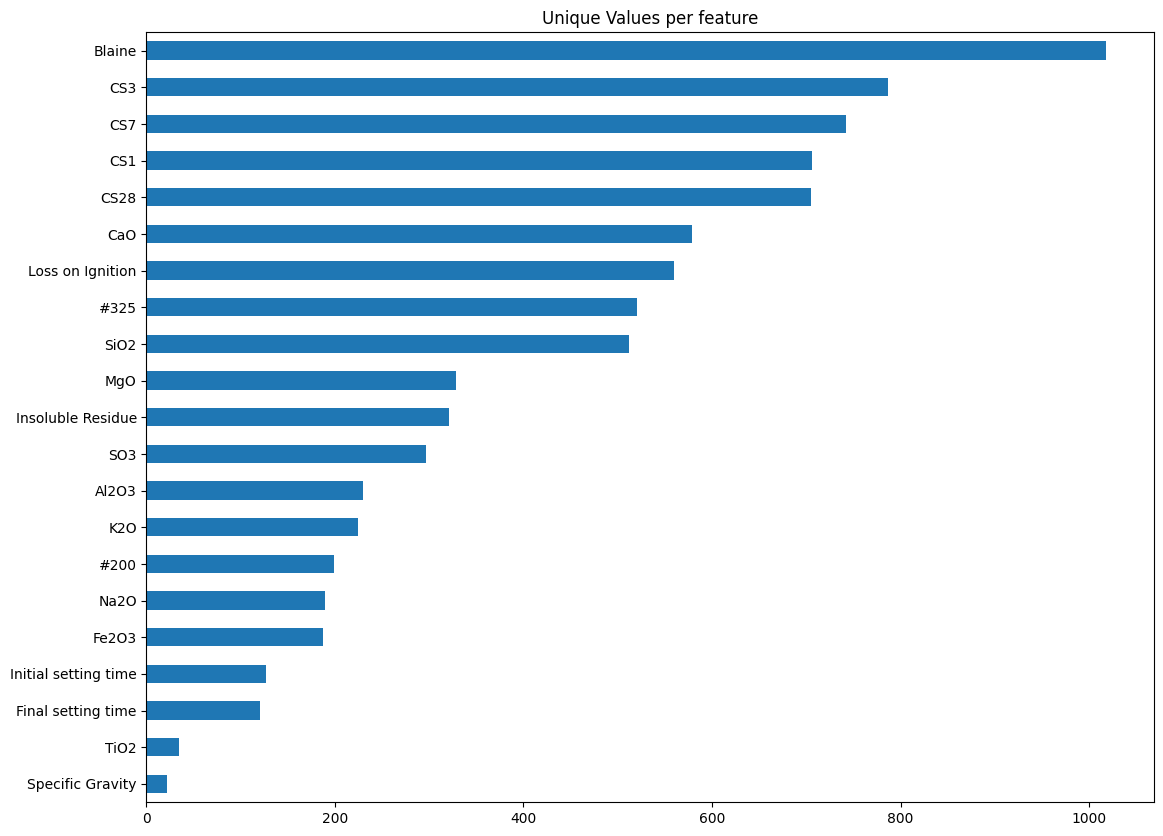

<IPython.core.display.Javascript object>

In [32]:
unique_values = df.select_dtypes(include="number").nunique().sort_values()
unique_values.plot.barh(logy=False, figsize=(13, 10), title="Unique Values per feature")

(array([0, 1, 2]),
 [Text(0, 0, 'Cement_Type'), Text(1, 0, 'Plant'), Text(2, 0, 'Date')])

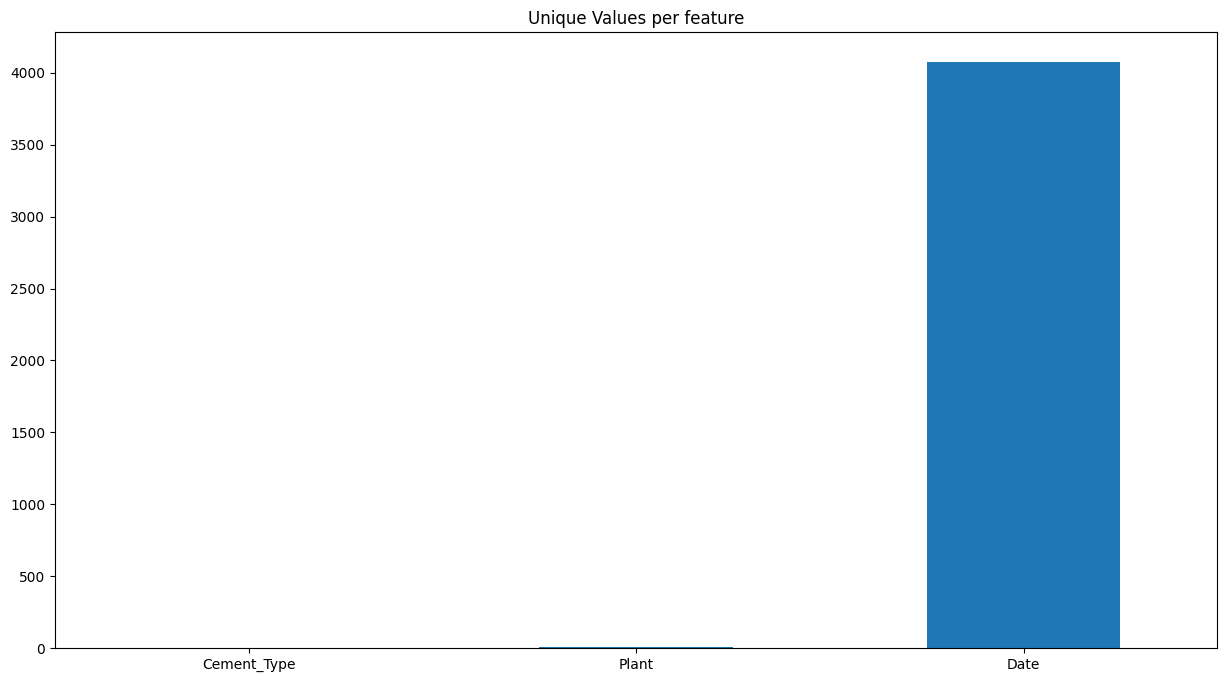

<IPython.core.display.Javascript object>

In [33]:
unique_values = df.select_dtypes(exclude="number").nunique().sort_values()

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

(array([0, 1]), [Text(0, 0, 'Cement_Type'), Text(1, 0, 'Plant')])

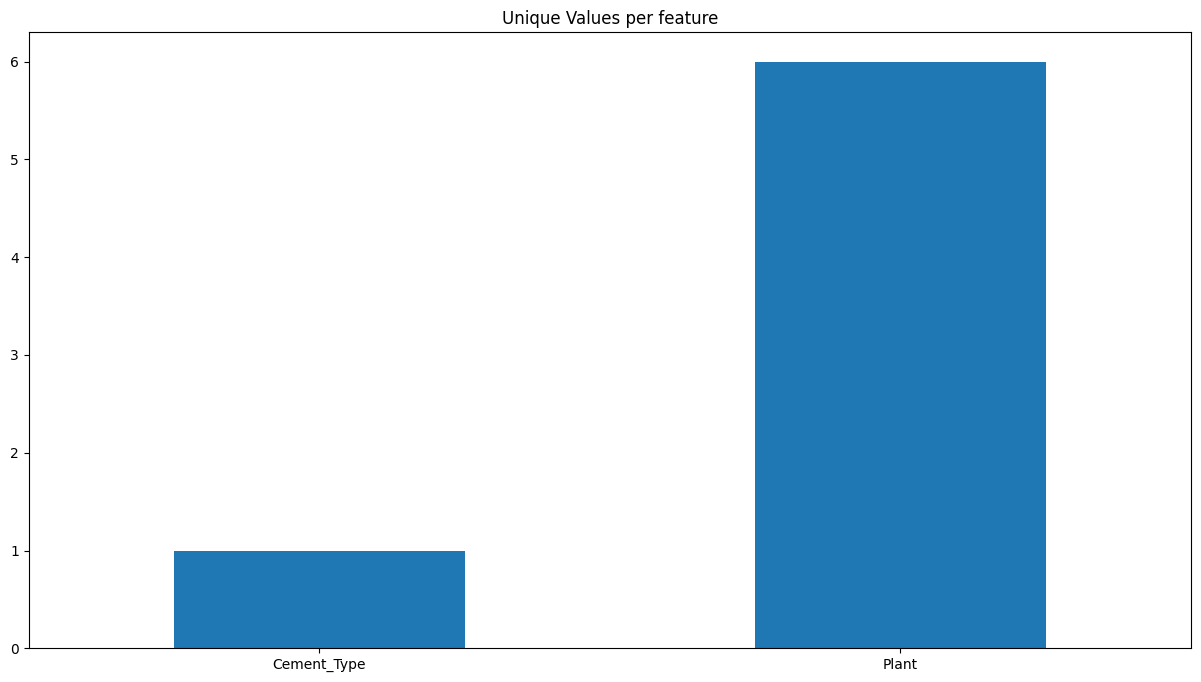

<IPython.core.display.Javascript object>

In [34]:
unique_values = (
    df.select_dtypes(exclude="number").drop("Date", axis=1).nunique().sort_values()
)

unique_values.plot.bar(logy=False, figsize=(15, 8), title="Unique Values per feature")

plt.xticks(rotation=0)

<h3>2.2. Missing values</h3>

In [35]:
print(
    "There are",
    df.isna().any().sum(),
    "variables with missing values from a total of",
    df.shape[1],
)

There are 21 variables with missing values from a total of 24


<IPython.core.display.Javascript object>

In [36]:
df.isna().any()

Plant                   False
Date                    False
CaO                      True
MgO                      True
Na2O                     True
Al2O3                    True
SiO2                     True
SO3                      True
K2O                      True
TiO2                     True
Fe2O3                    True
Loss on Ignition         True
Insoluble Residue        True
Blaine                   True
#200                     True
#325                     True
Specific Gravity         True
Final setting time       True
Initial setting time     True
CS1                      True
CS3                      True
CS7                      True
CS28                     True
Cement_Type             False
dtype: bool

<IPython.core.display.Javascript object>

In [37]:
df.isna().sum().sort_values(ascending=False).to_frame(
    name="Missing (count)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

In [38]:
(df.isna().sum() / df.shape[0] * 100).sort_values(ascending=False).to_frame(
    name="Missing (%)"
).style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<BarContainer object of 24 artists>

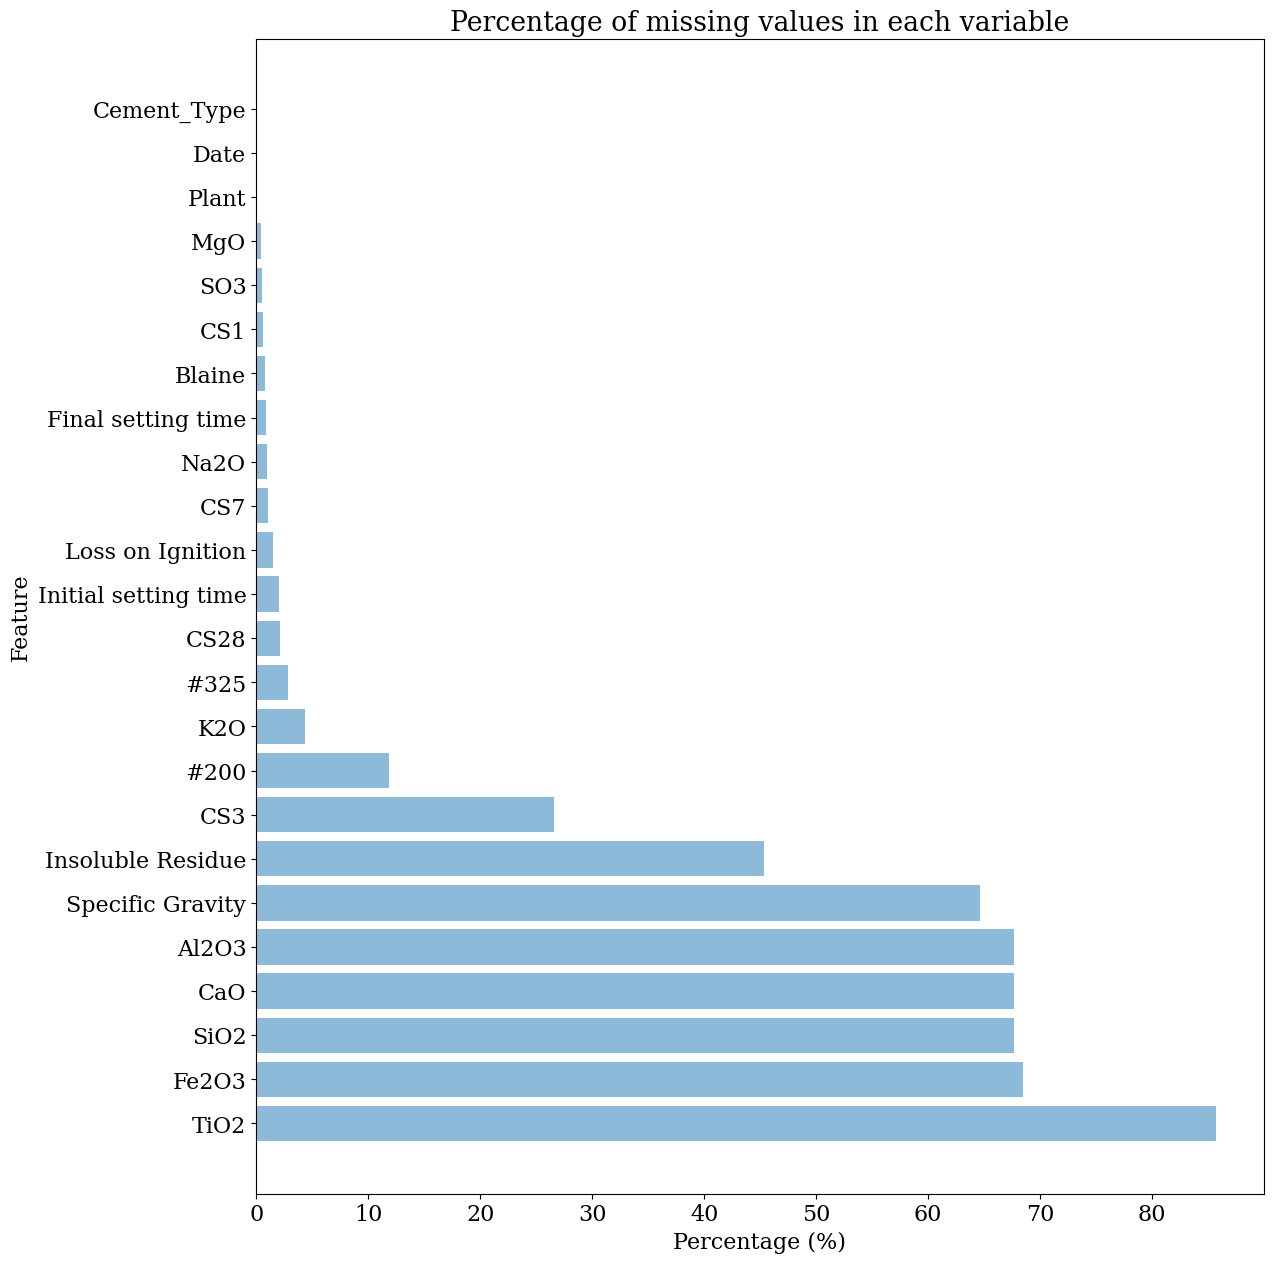

<IPython.core.display.Javascript object>

In [39]:
miss_perc = df.isnull().sum() / df.shape[0] * 100
miss_perc = miss_perc.sort_values(ascending=False)
plt.rc("font", family="serif", size=16)
plt.figure(figsize=(13, 15))
plt.title("Percentage of missing values in each variable")
plt.xlabel("Percentage (%)")
plt.ylabel("Feature")
plt.barh(miss_perc.index, miss_perc.round(2), alpha=0.5)

### Missing values per plant

In [40]:
missing_values = []
for plant, group in df.groupby("Plant"):
    missing_percentages = (group.isna().sum() / group.shape[0]) * 100
    missing_percentages = missing_percentages.sort_values(ascending=False)
    missing_percentages = missing_percentages.to_frame(name=f"Missing (%) for {plant}")
    missing_values.append(missing_percentages.T)

result = pd.concat(missing_values)
result.T.style.background_gradient(cmap="Reds")

<IPython.core.display.Javascript object>

<h3>2.4. Duplicates</h3>

In [41]:
n_duplicates = df.duplicated().sum()
print(f"There are {n_duplicates} duplicates samples.")

There are 0 duplicates samples.


<IPython.core.display.Javascript object>

<h2>3. Content Investigation</h2>

<h3>3.1. Feature distribution</h3>

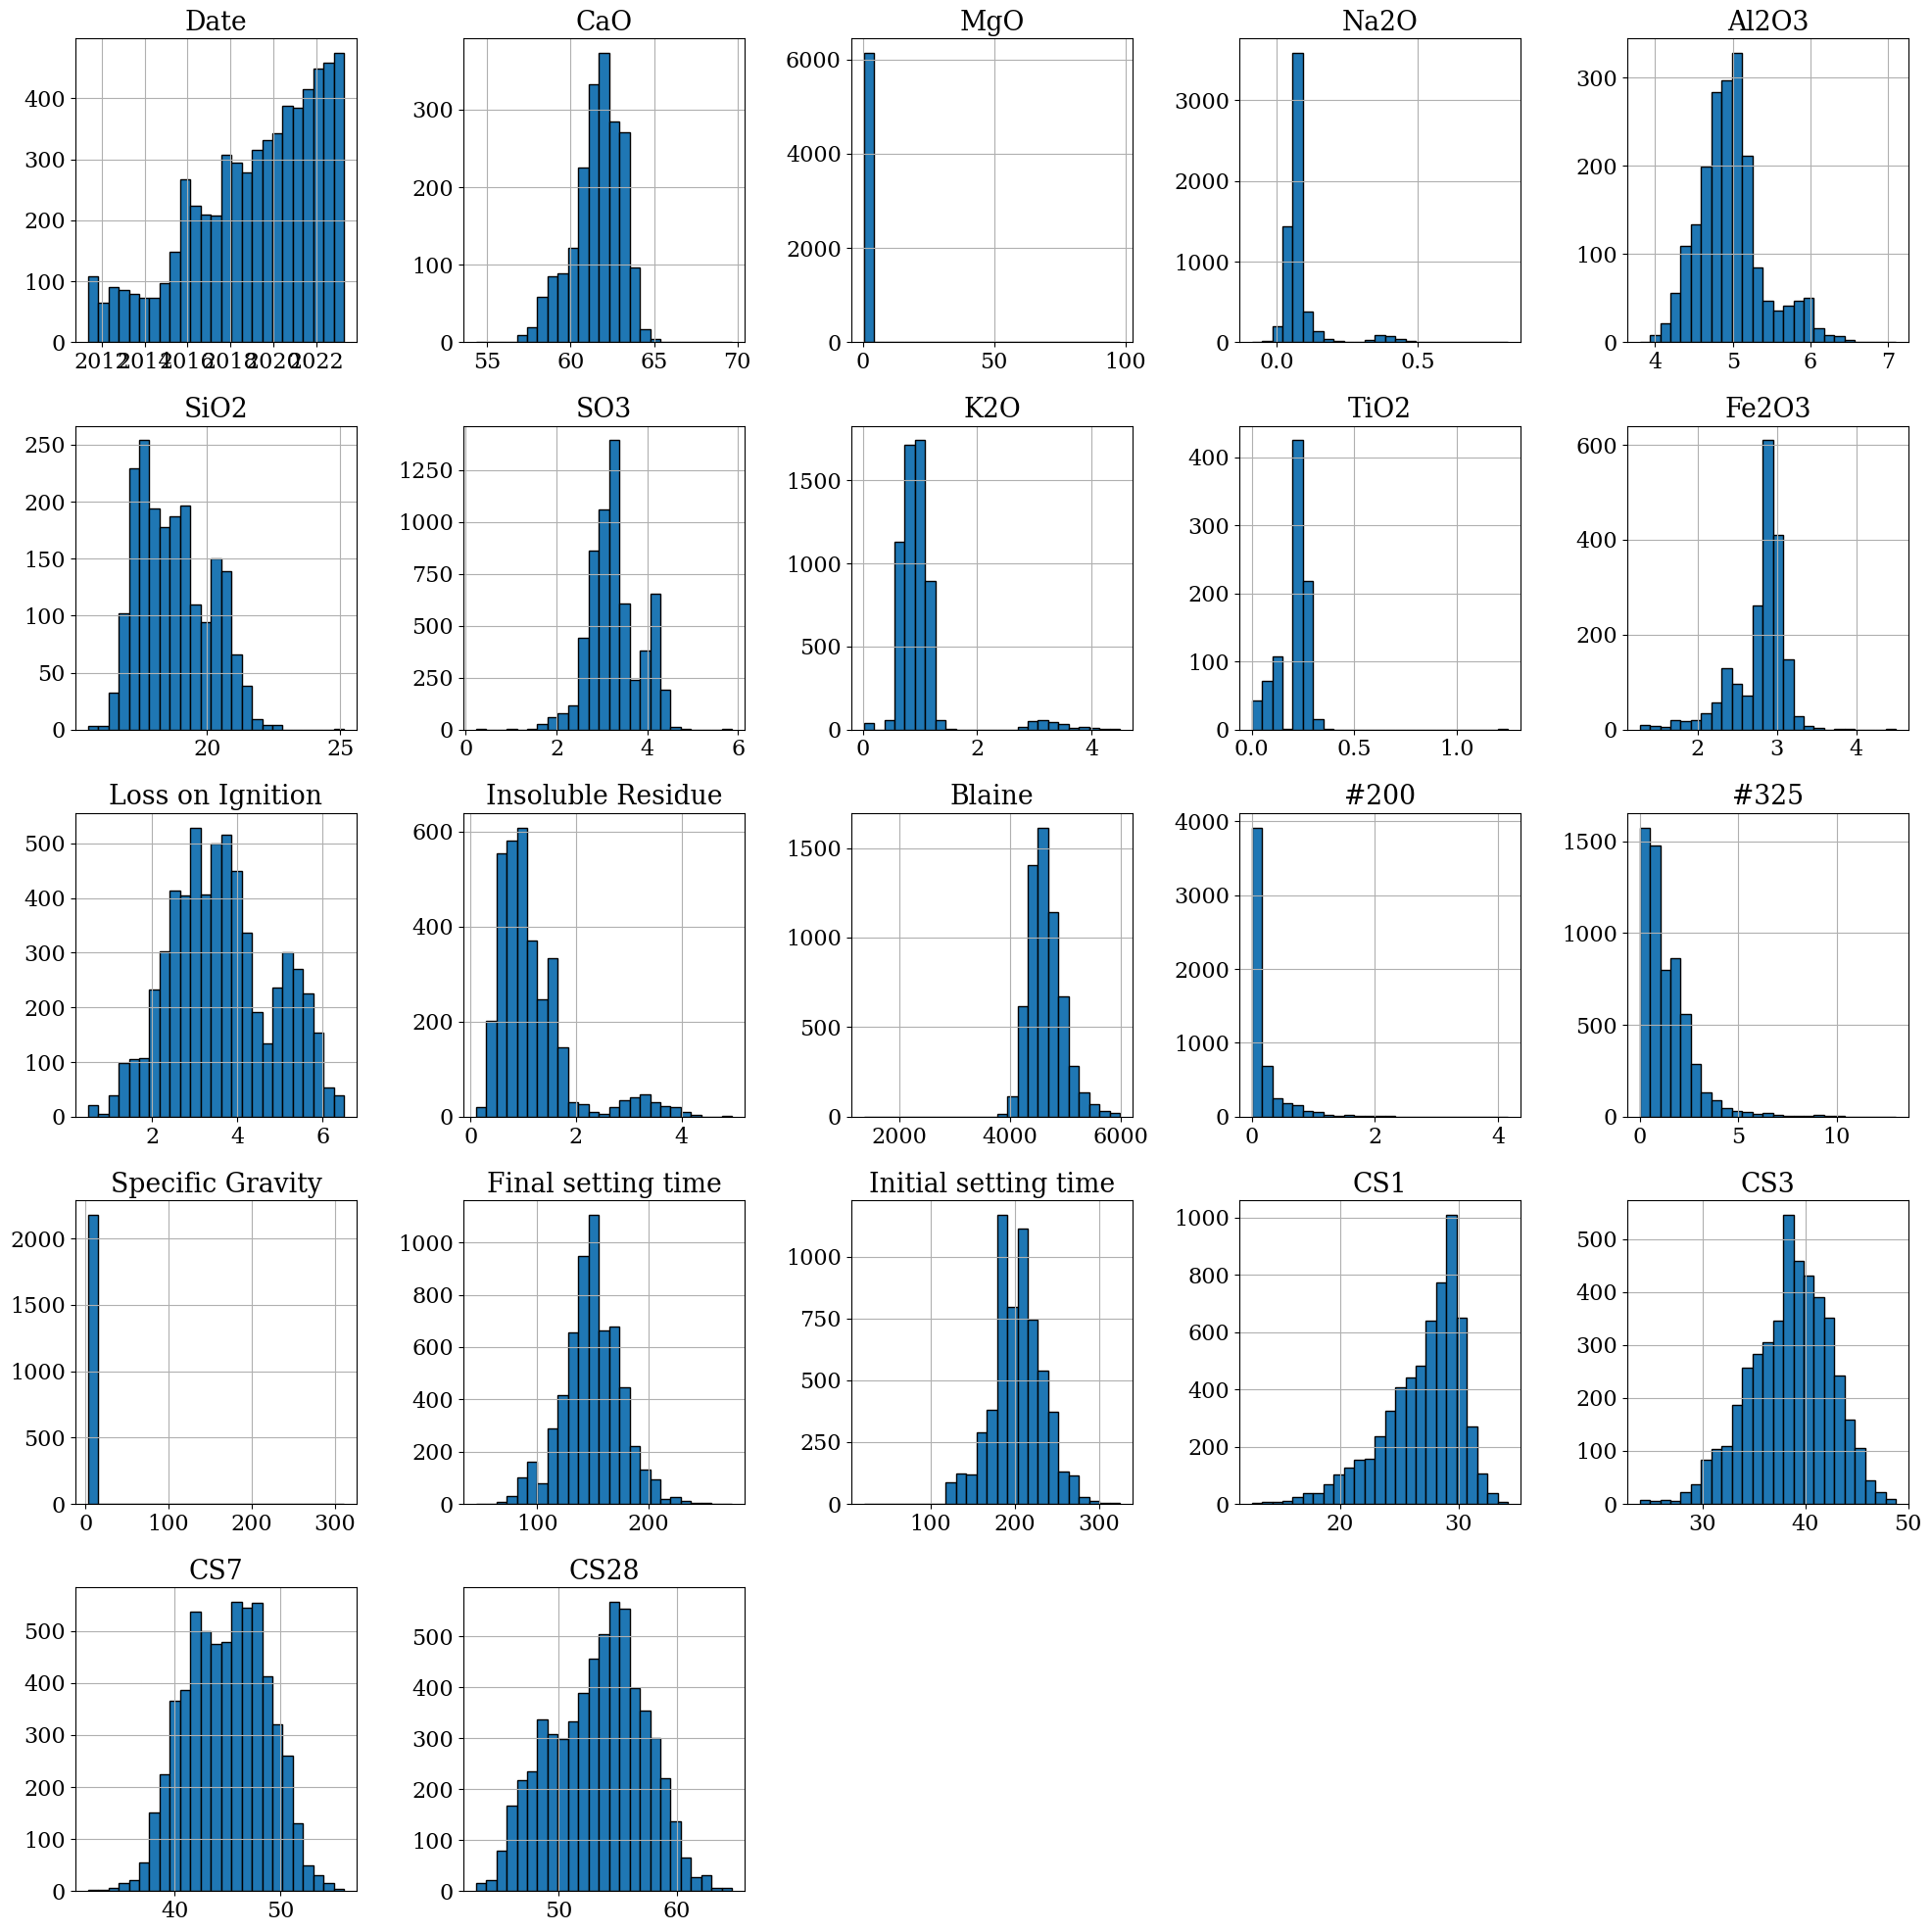

<IPython.core.display.Javascript object>

In [42]:
df.hist(bins=25, figsize=(20, 20), layout=(-1, 5), edgecolor="black")
plt.tight_layout()

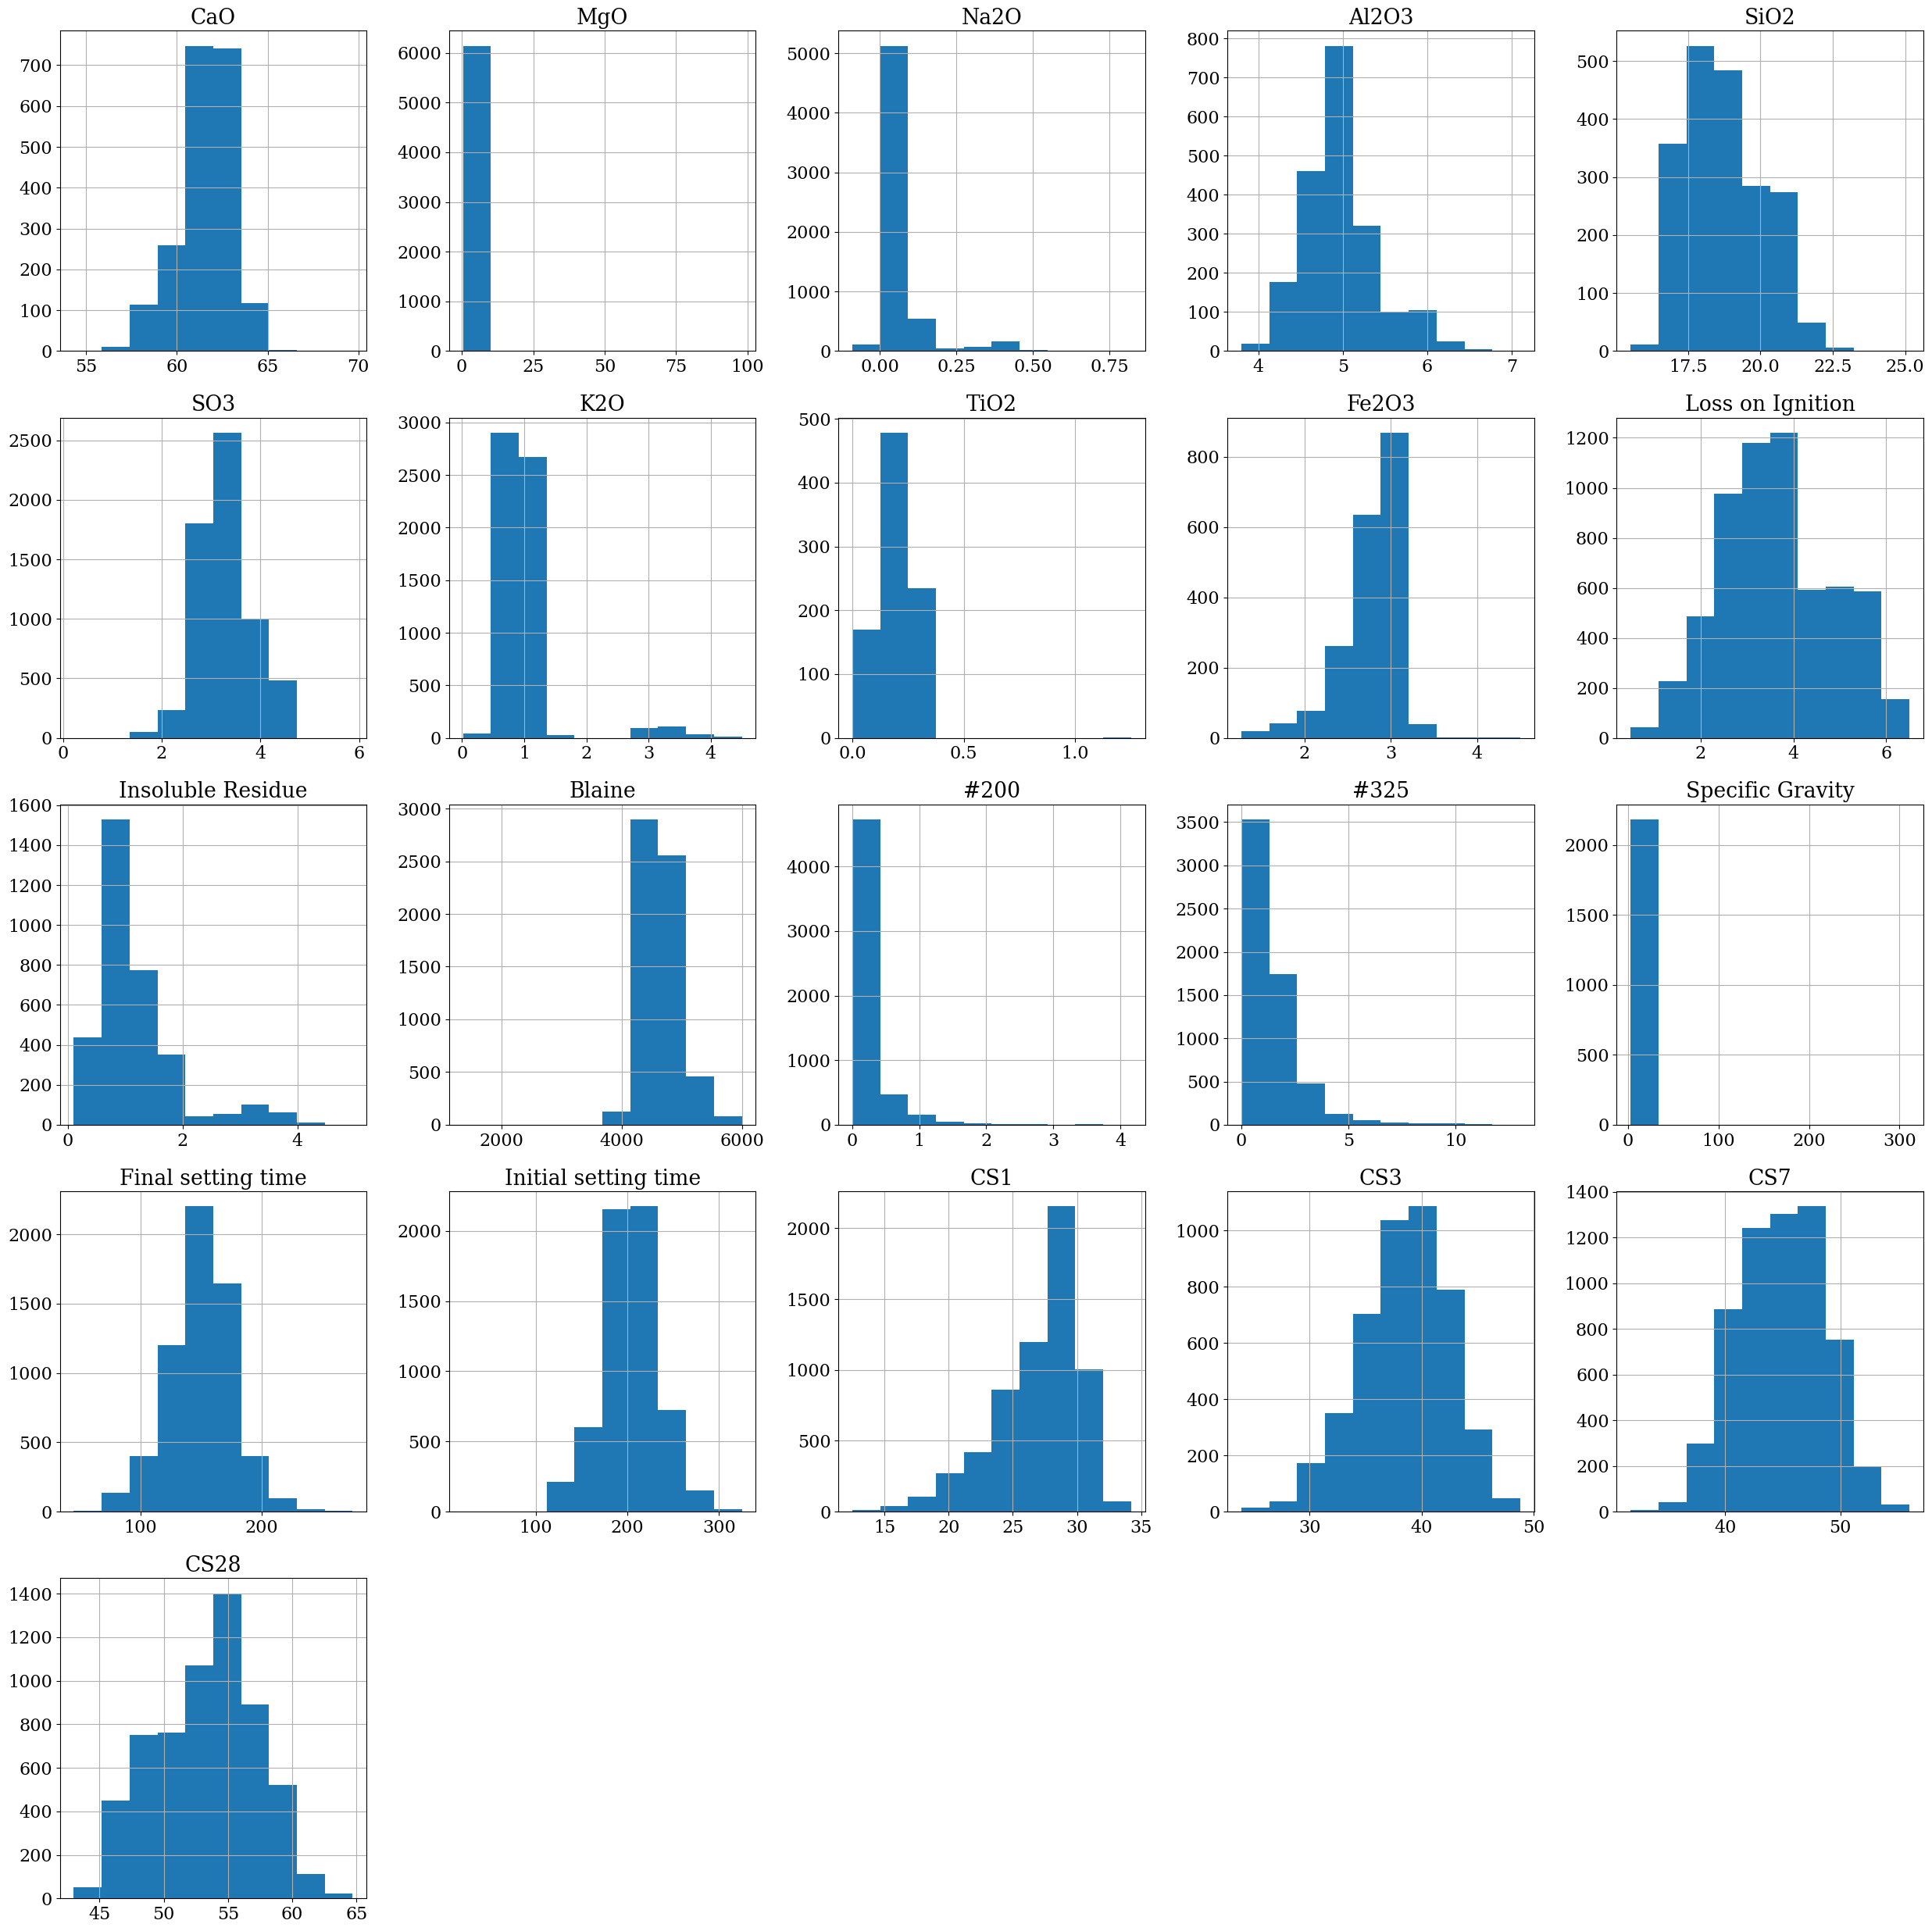

<IPython.core.display.Javascript object>

In [43]:
df.select_dtypes(include="float64").hist(
    figsize=(25, 25),
)
plt.tight_layout()

<h3>Data distribution - KDE plot</h3>

Kdeplot is a Kernel Distribution Estimation Plot which depicts the probability density function of the continuous or non-parametric data variables

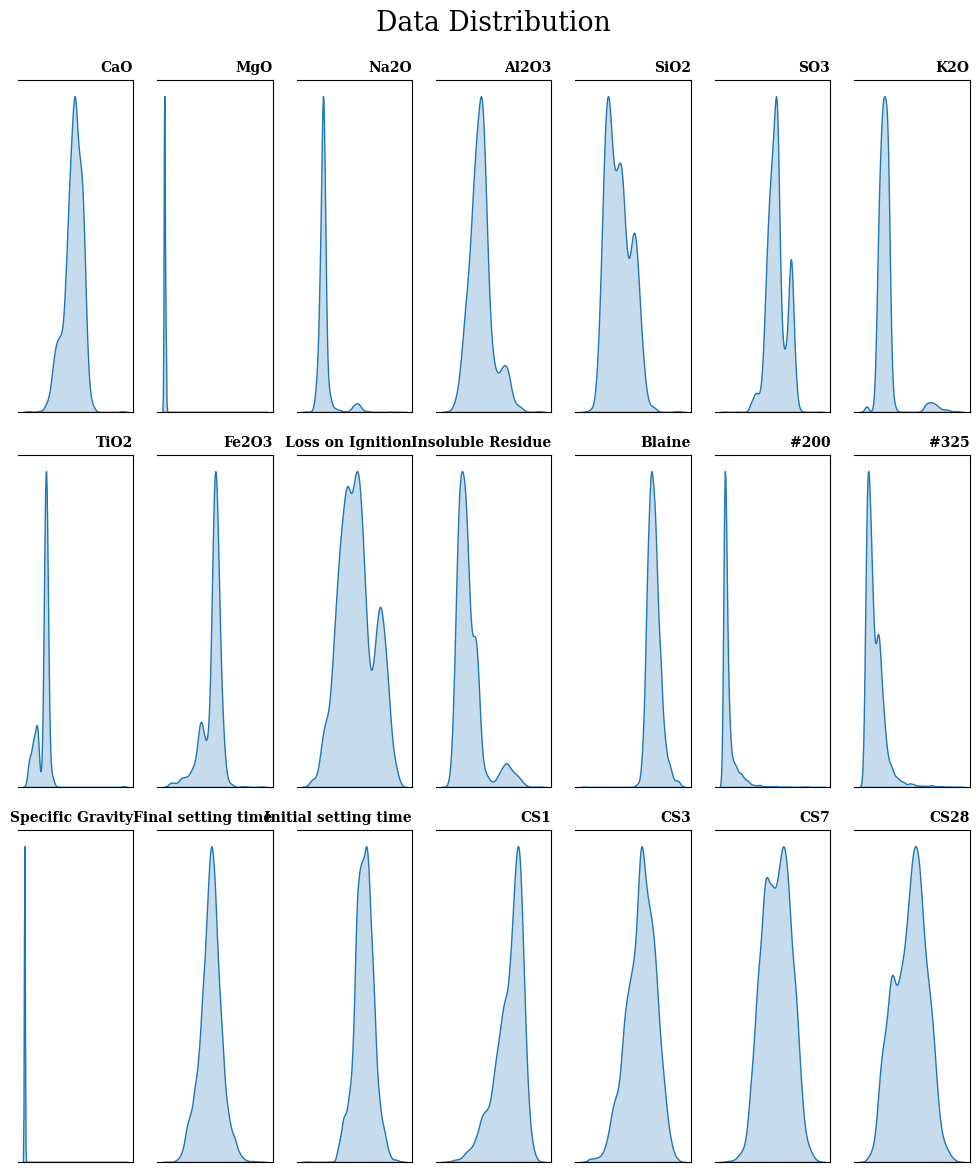

<IPython.core.display.Javascript object>

In [44]:
warnings.filterwarnings("ignore")

fig, axes = plt.subplots(3, 7, figsize=(10, 12))
axes = axes.flatten()
# sns.set_palette(sns.color_palette(["#2a9d8f", "#e9c46a"]))
columns = df.select_dtypes(include="float64").columns

for i, ax in enumerate(axes):
    sns.kdeplot(data=df[columns], x=columns[i], ax=ax, palette=["#2a9d8f"], fill=True)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.spines["left"].set_visible(False)
    ax.set_title(columns[i], loc="right", weight="bold", fontsize=10)

# fig.supxlabel('Average (float features)', ha='center', fontweight='bold')
fig.suptitle("Data Distribution")

fig.tight_layout()
plt.show()

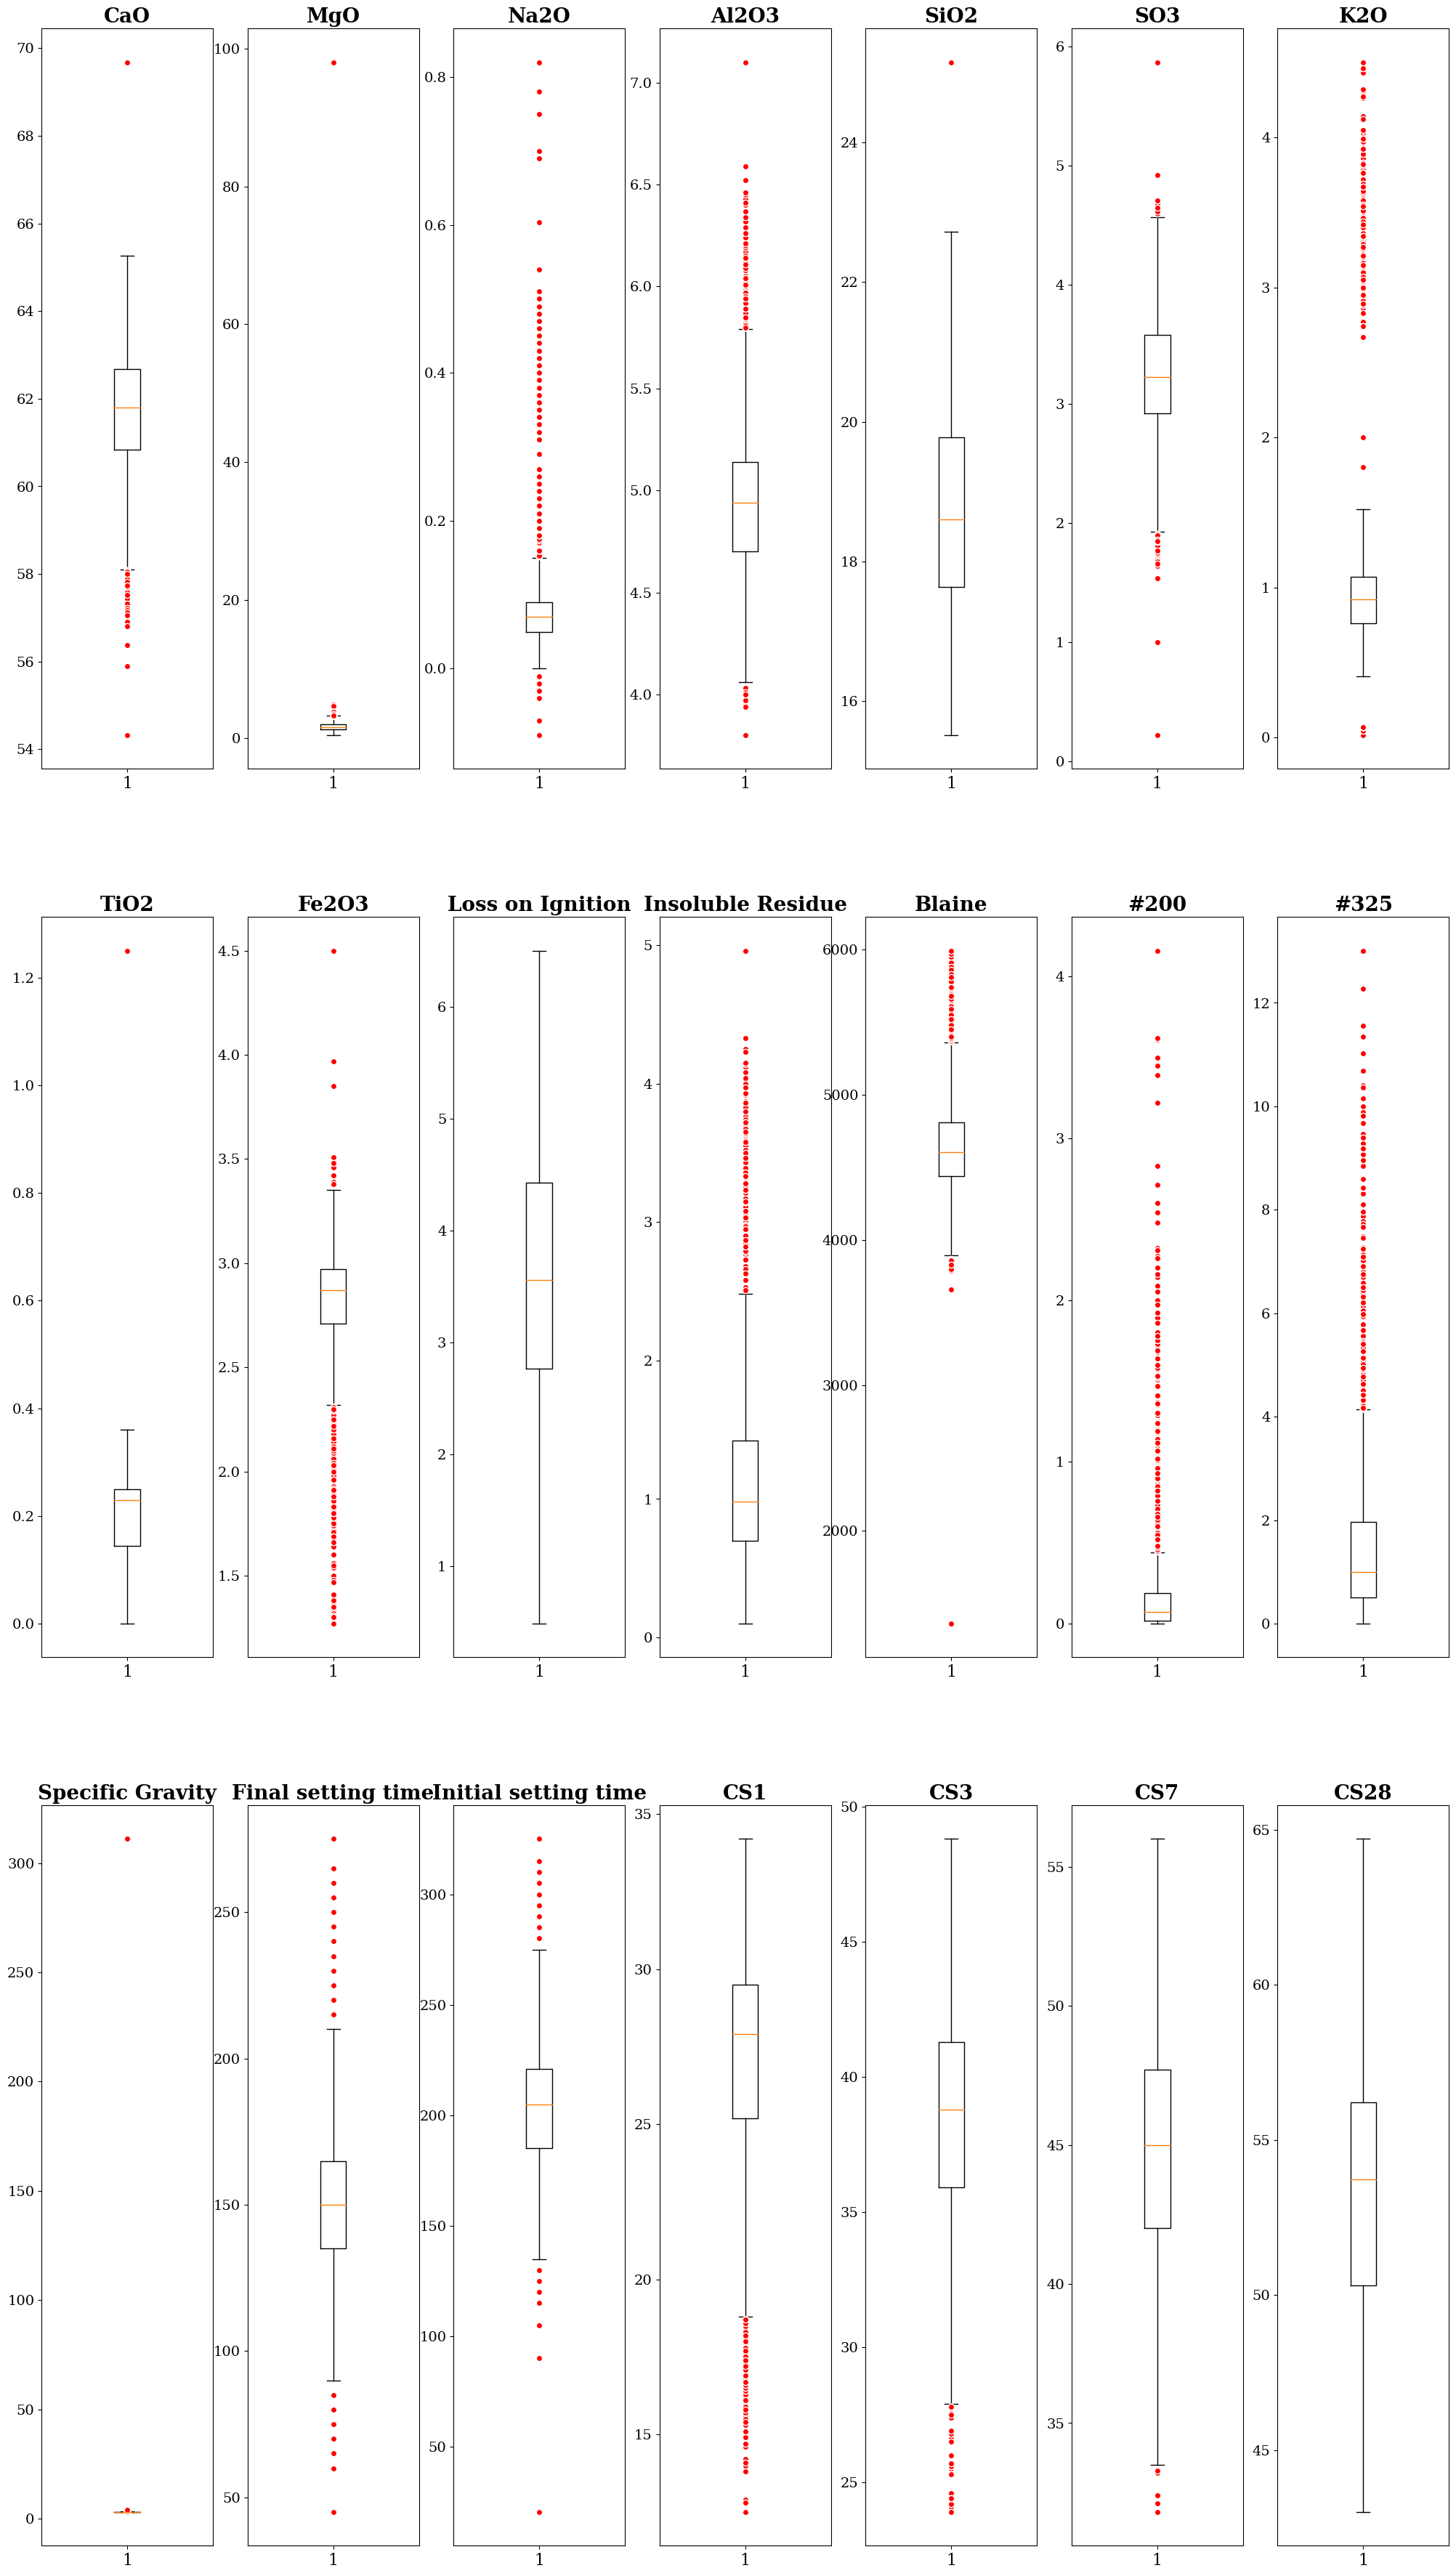

<IPython.core.display.Javascript object>

In [45]:
# Creating subplot of each column with its own scale
float64_columns = df.select_dtypes(include="float64").columns
df_float64_columns = df[float64_columns]

red_circle = dict(markerfacecolor="red", marker="o", markeredgecolor="white")
fig, axs = plt.subplots(3, 7, figsize=(25, 45))

for i, ax in enumerate(axs.flat):
    ax.boxplot(df_float64_columns.iloc[:, i].dropna(), flierprops=red_circle)
    ax.set_title(df_float64_columns.columns[i], fontsize=20, fontweight="bold")
    ax.tick_params(axis="y", labelsize=14)

<h3>3.3. Feature Relationship</h3>

<h4>3.3.1 Pearson</h4>

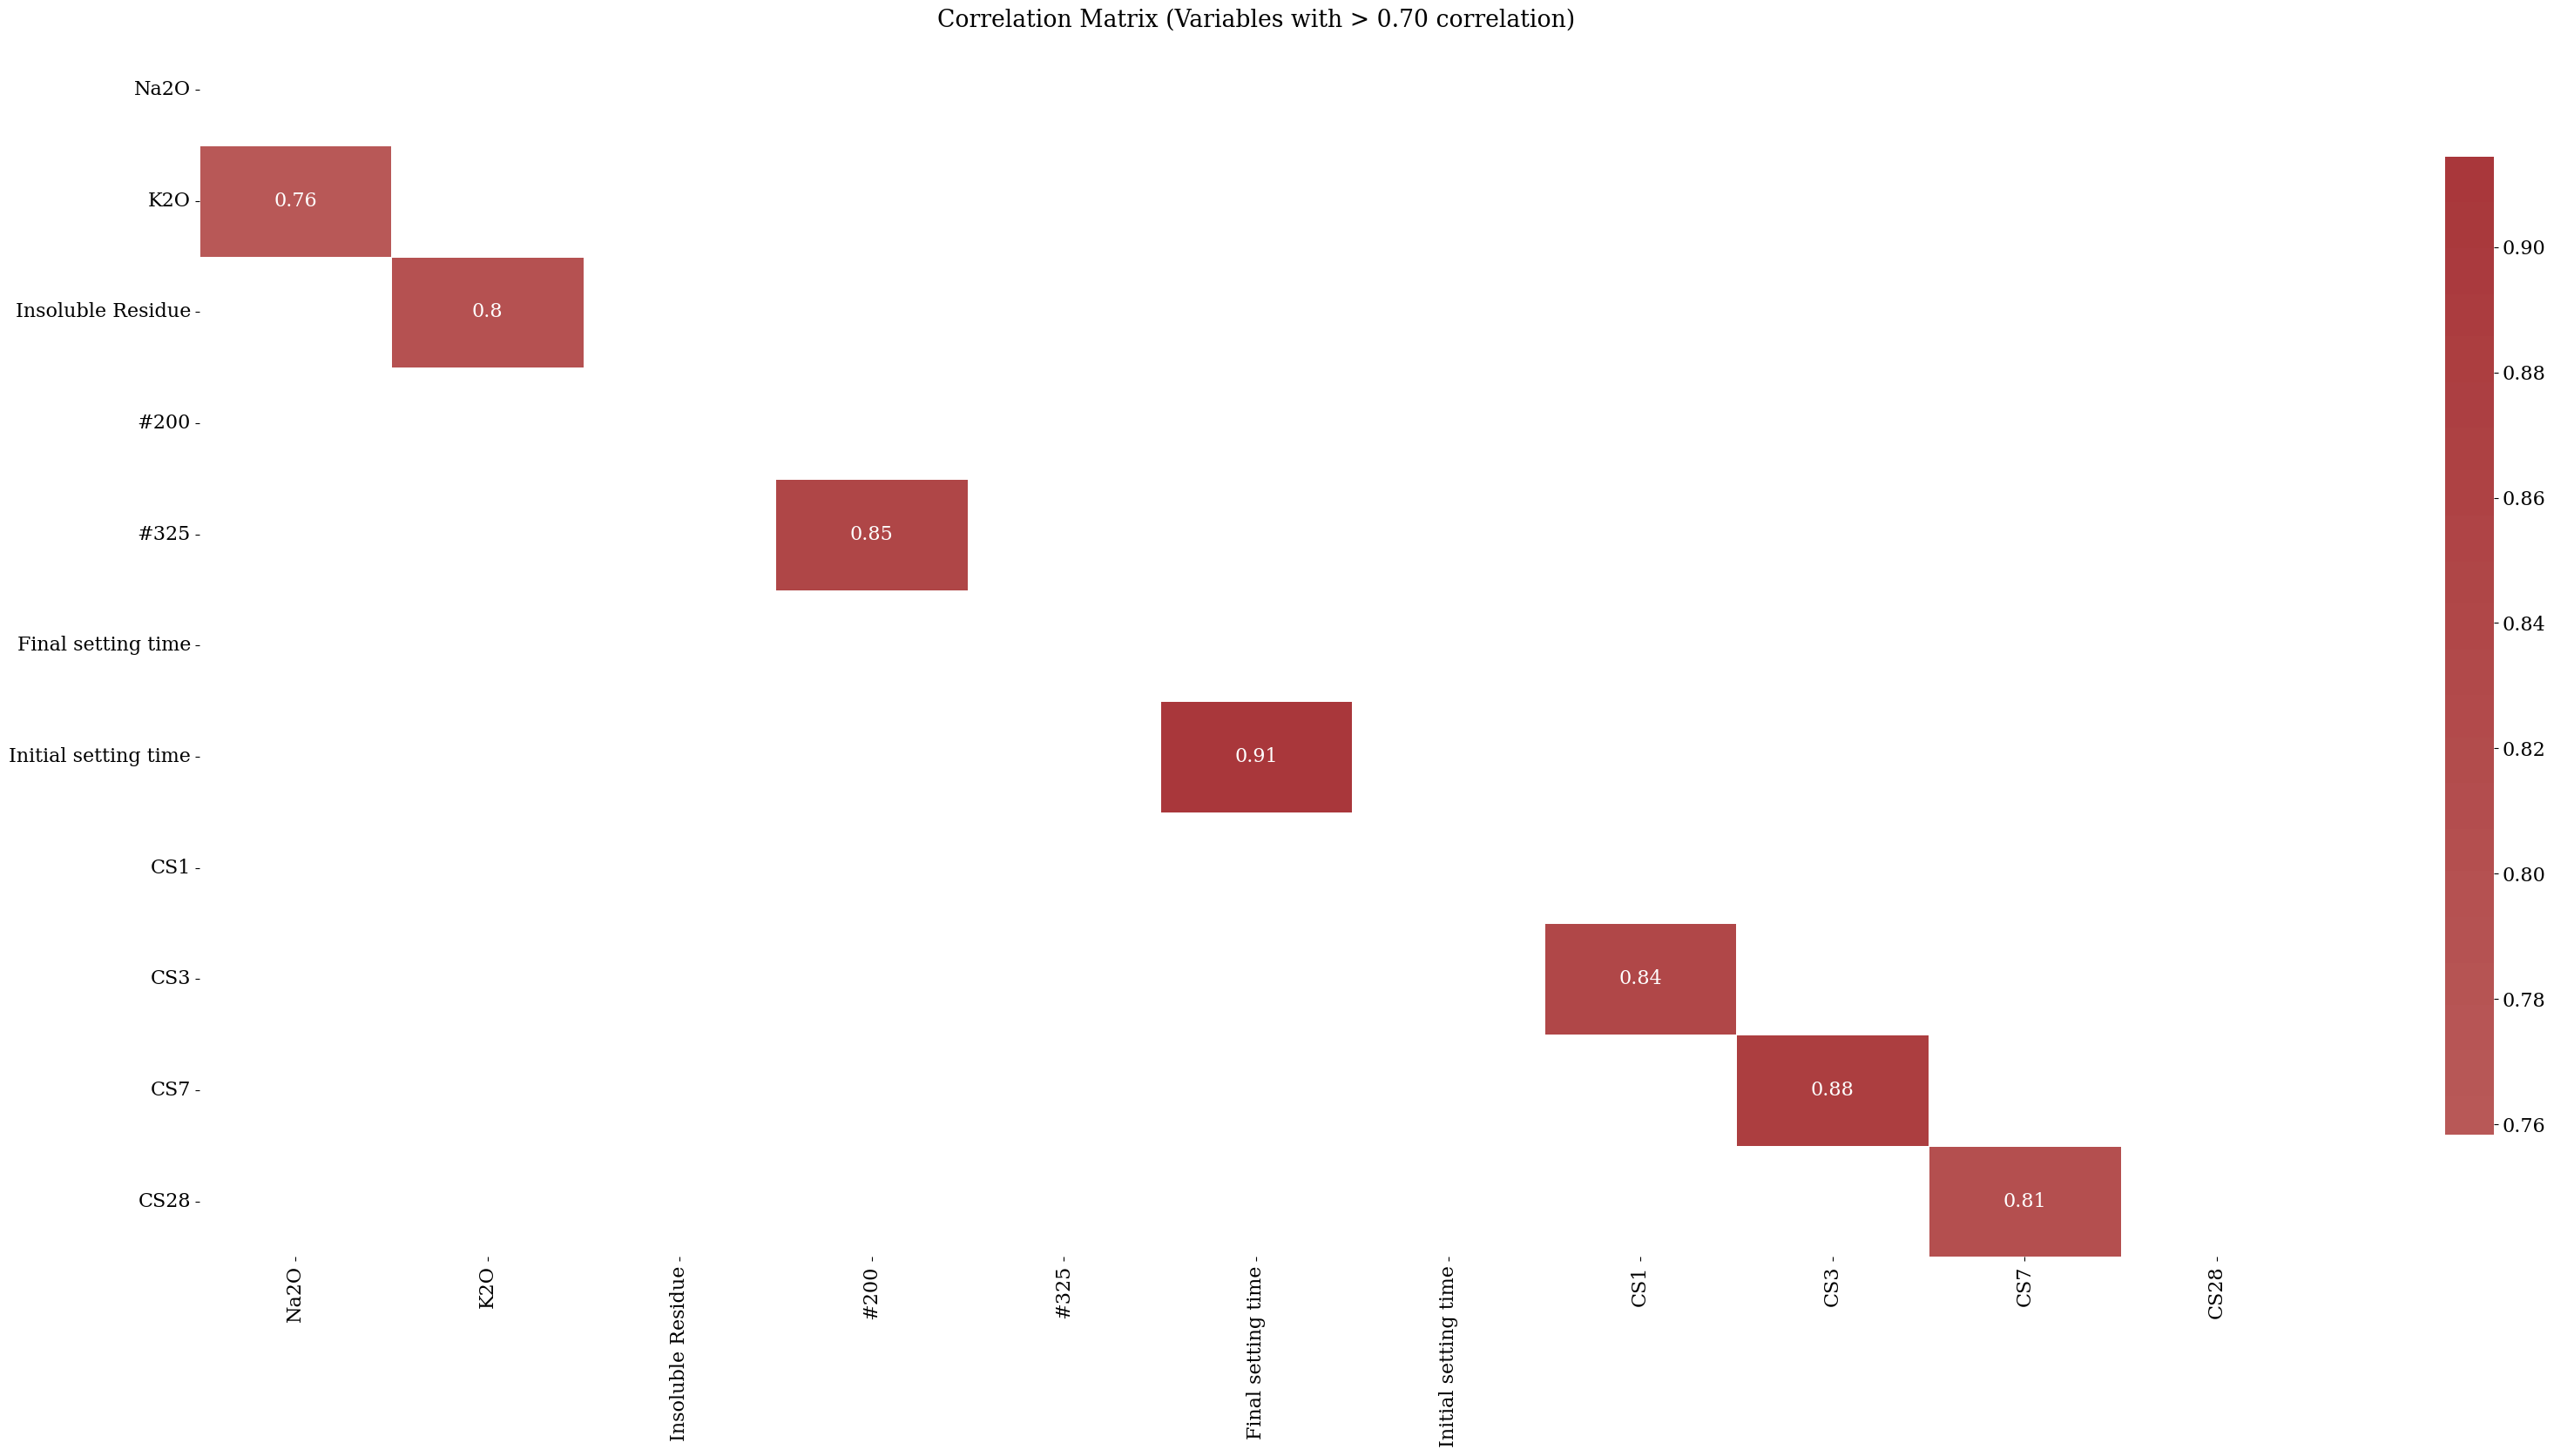

<IPython.core.display.Javascript object>

In [46]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [47]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="pearson").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.914463
CS3                 CS7                     0.880908
#200                #325                    0.847599
CS1                 CS3                     0.841161
CS7                 CS28                    0.806080
K2O                 Insoluble Residue       0.798932
Na2O                K2O                     0.758336
dtype: float64

<IPython.core.display.Javascript object>

In [48]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.806080
CS3                   CS28    0.624397
Al2O3                 CS28    0.431434
Loss on Ignition      CS28    0.431117
Insoluble Residue     CS28    0.414823
CS1                   CS28    0.347551
K2O                   CS28    0.280123
SiO2                  CS28    0.273253
MgO                   CS28    0.232581
Na2O                  CS28    0.203090
CaO                   CS28    0.201165
Fe2O3                 CS28    0.190119
TiO2                  CS28    0.187226
Initial setting time  CS28    0.176634
#325                  CS28    0.168771
#200                  CS28    0.142260
Final setting time    CS28    0.141650
SO3                   CS28    0.139600
Blaine                CS28    0.136886
Specific Gravity      CS28    0.008755
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.2 Spearman</h4>

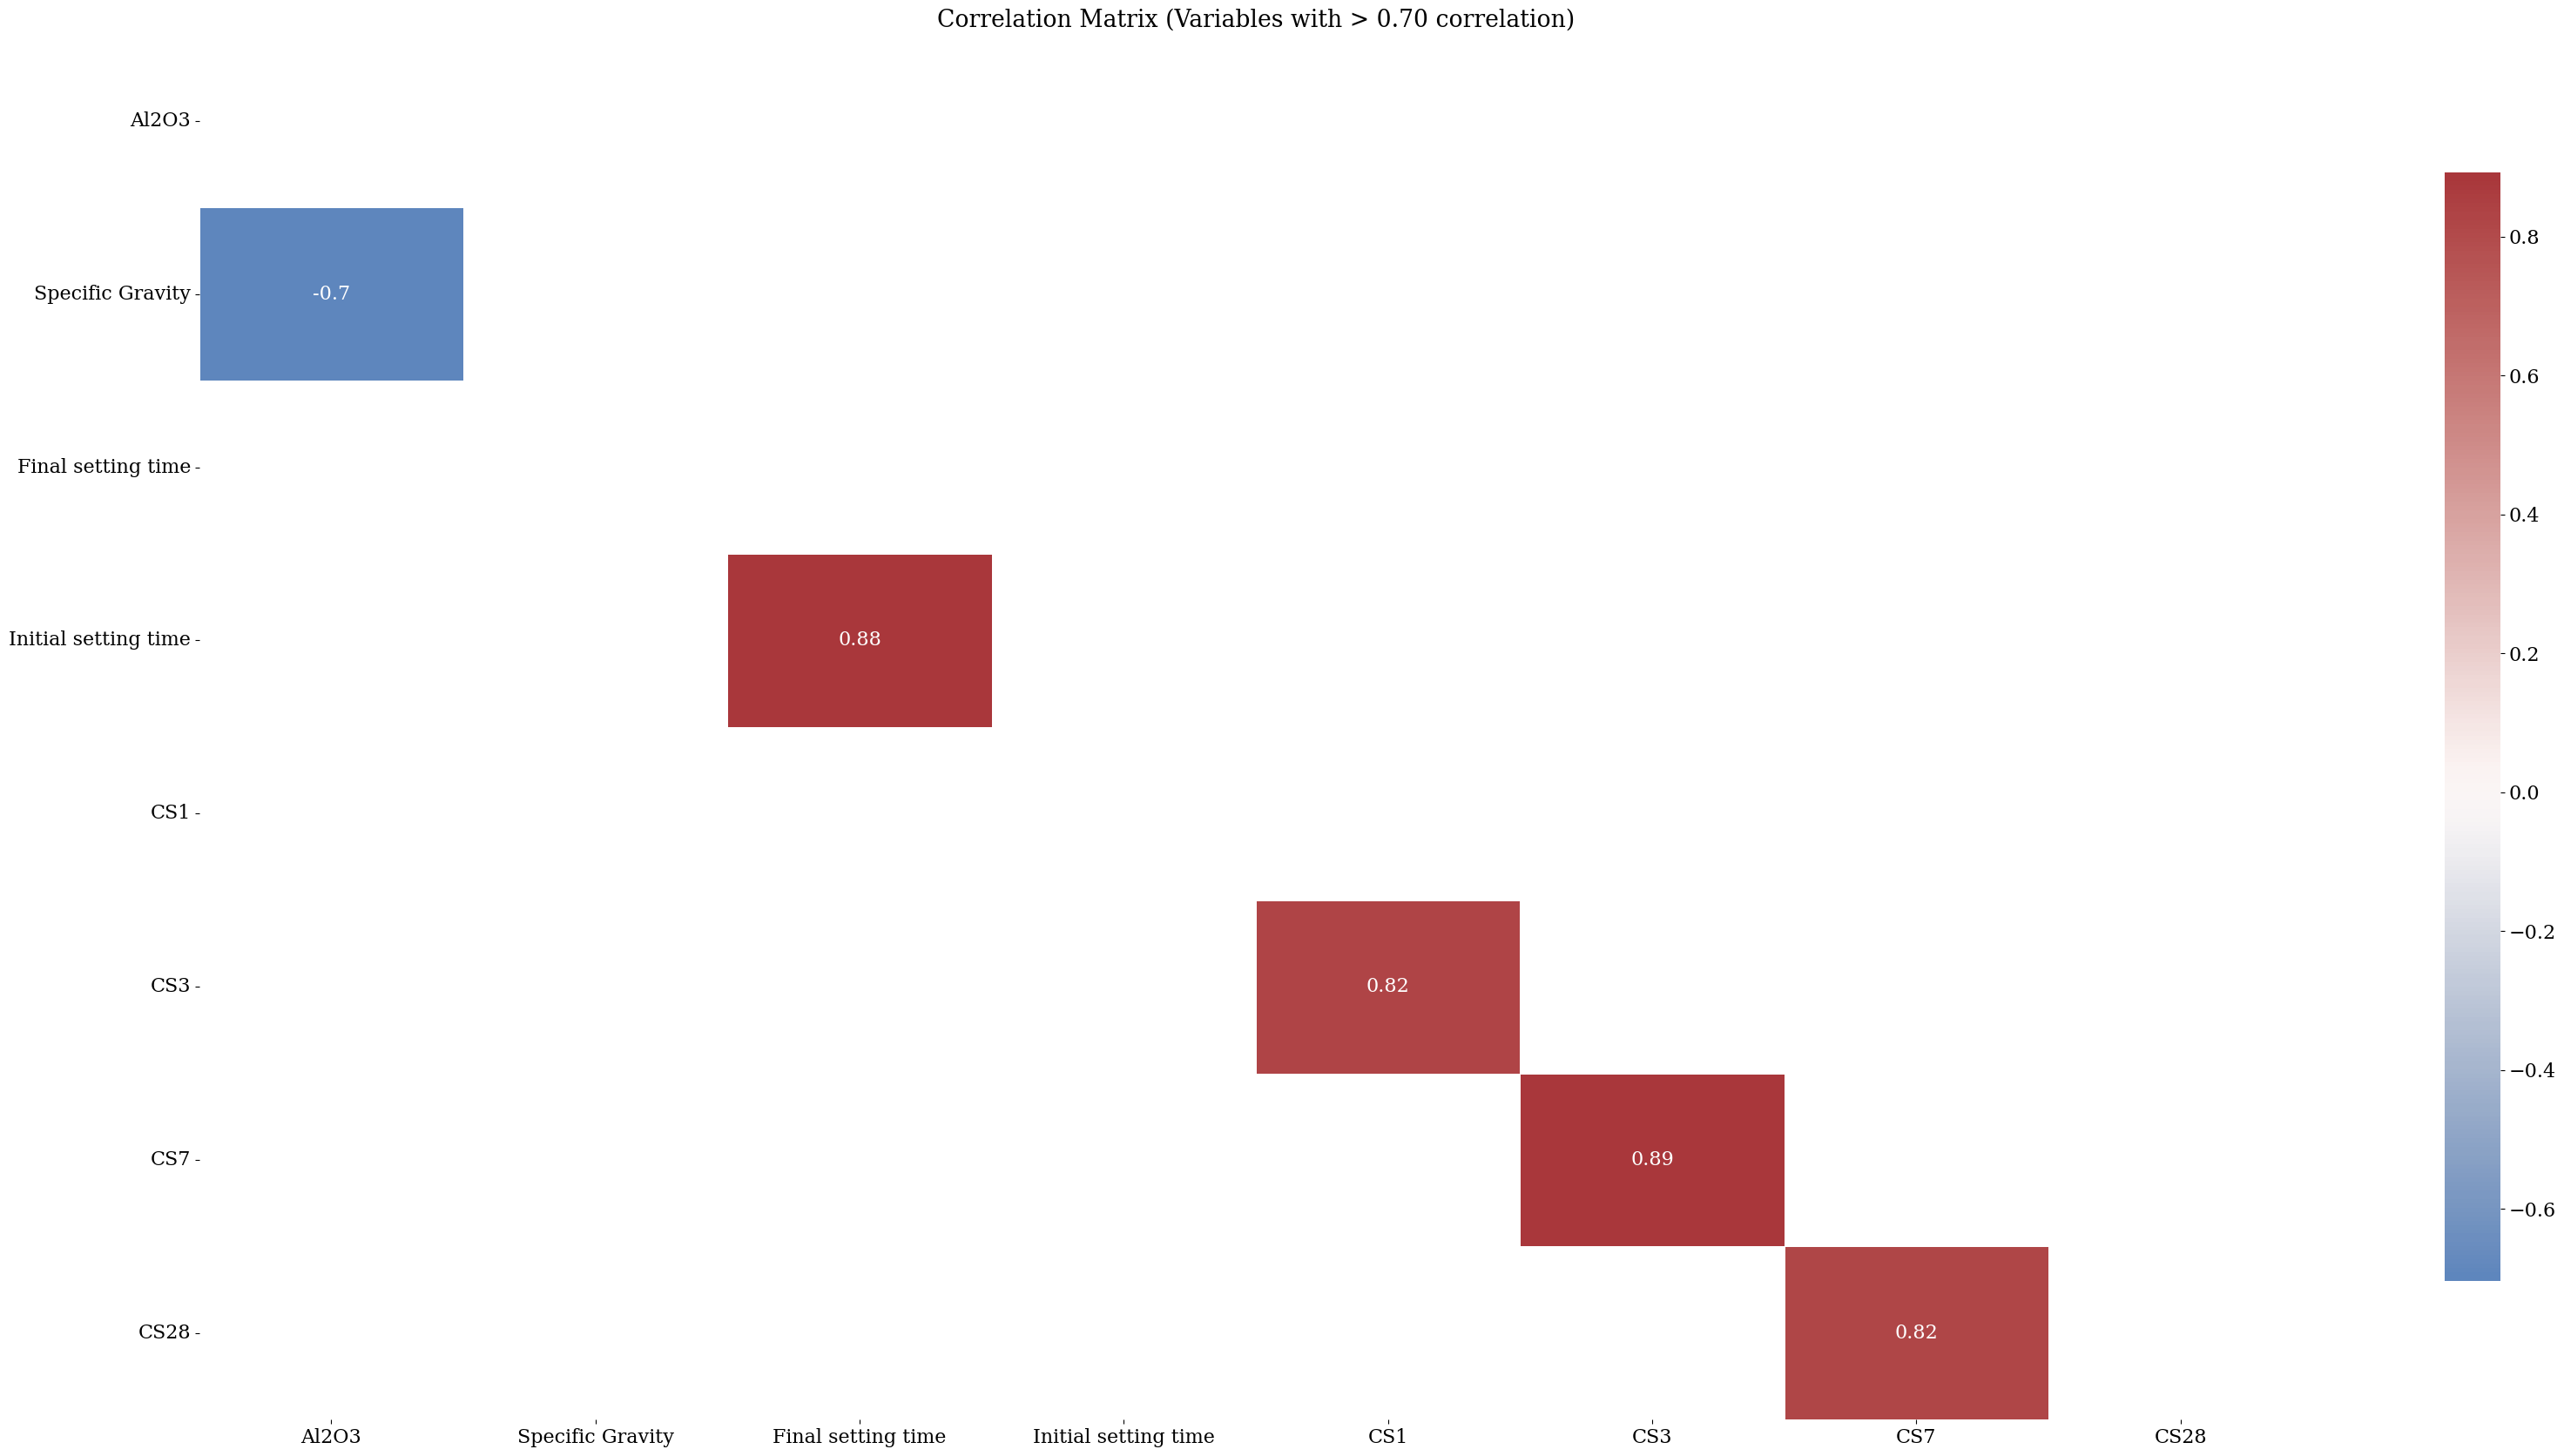

<IPython.core.display.Javascript object>

In [49]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [50]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="spearman").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

CS3                 CS7                     0.892071
Final setting time  Initial setting time    0.882407
CS1                 CS3                     0.823588
CS7                 CS28                    0.821894
Al2O3               Specific Gravity        0.703853
dtype: float64

<IPython.core.display.Javascript object>

In [51]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.821894
CS3                   CS28    0.678617
Al2O3                 CS28    0.505387
Insoluble Residue     CS28    0.429925
CS1                   CS28    0.425899
MgO                   CS28    0.423590
Loss on Ignition      CS28    0.391760
SiO2                  CS28    0.326864
CaO                   CS28    0.284749
TiO2                  CS28    0.183578
Specific Gravity      CS28    0.178487
Initial setting time  CS28    0.175354
Final setting time    CS28    0.164614
#325                  CS28    0.137676
Fe2O3                 CS28    0.128952
Blaine                CS28    0.121190
SO3                   CS28    0.103984
K2O                   CS28    0.071988
#200                  CS28    0.054653
Na2O                  CS28    0.030240
dtype: float64

<IPython.core.display.Javascript object>

<h4>3.3.1 Kendall</h4>

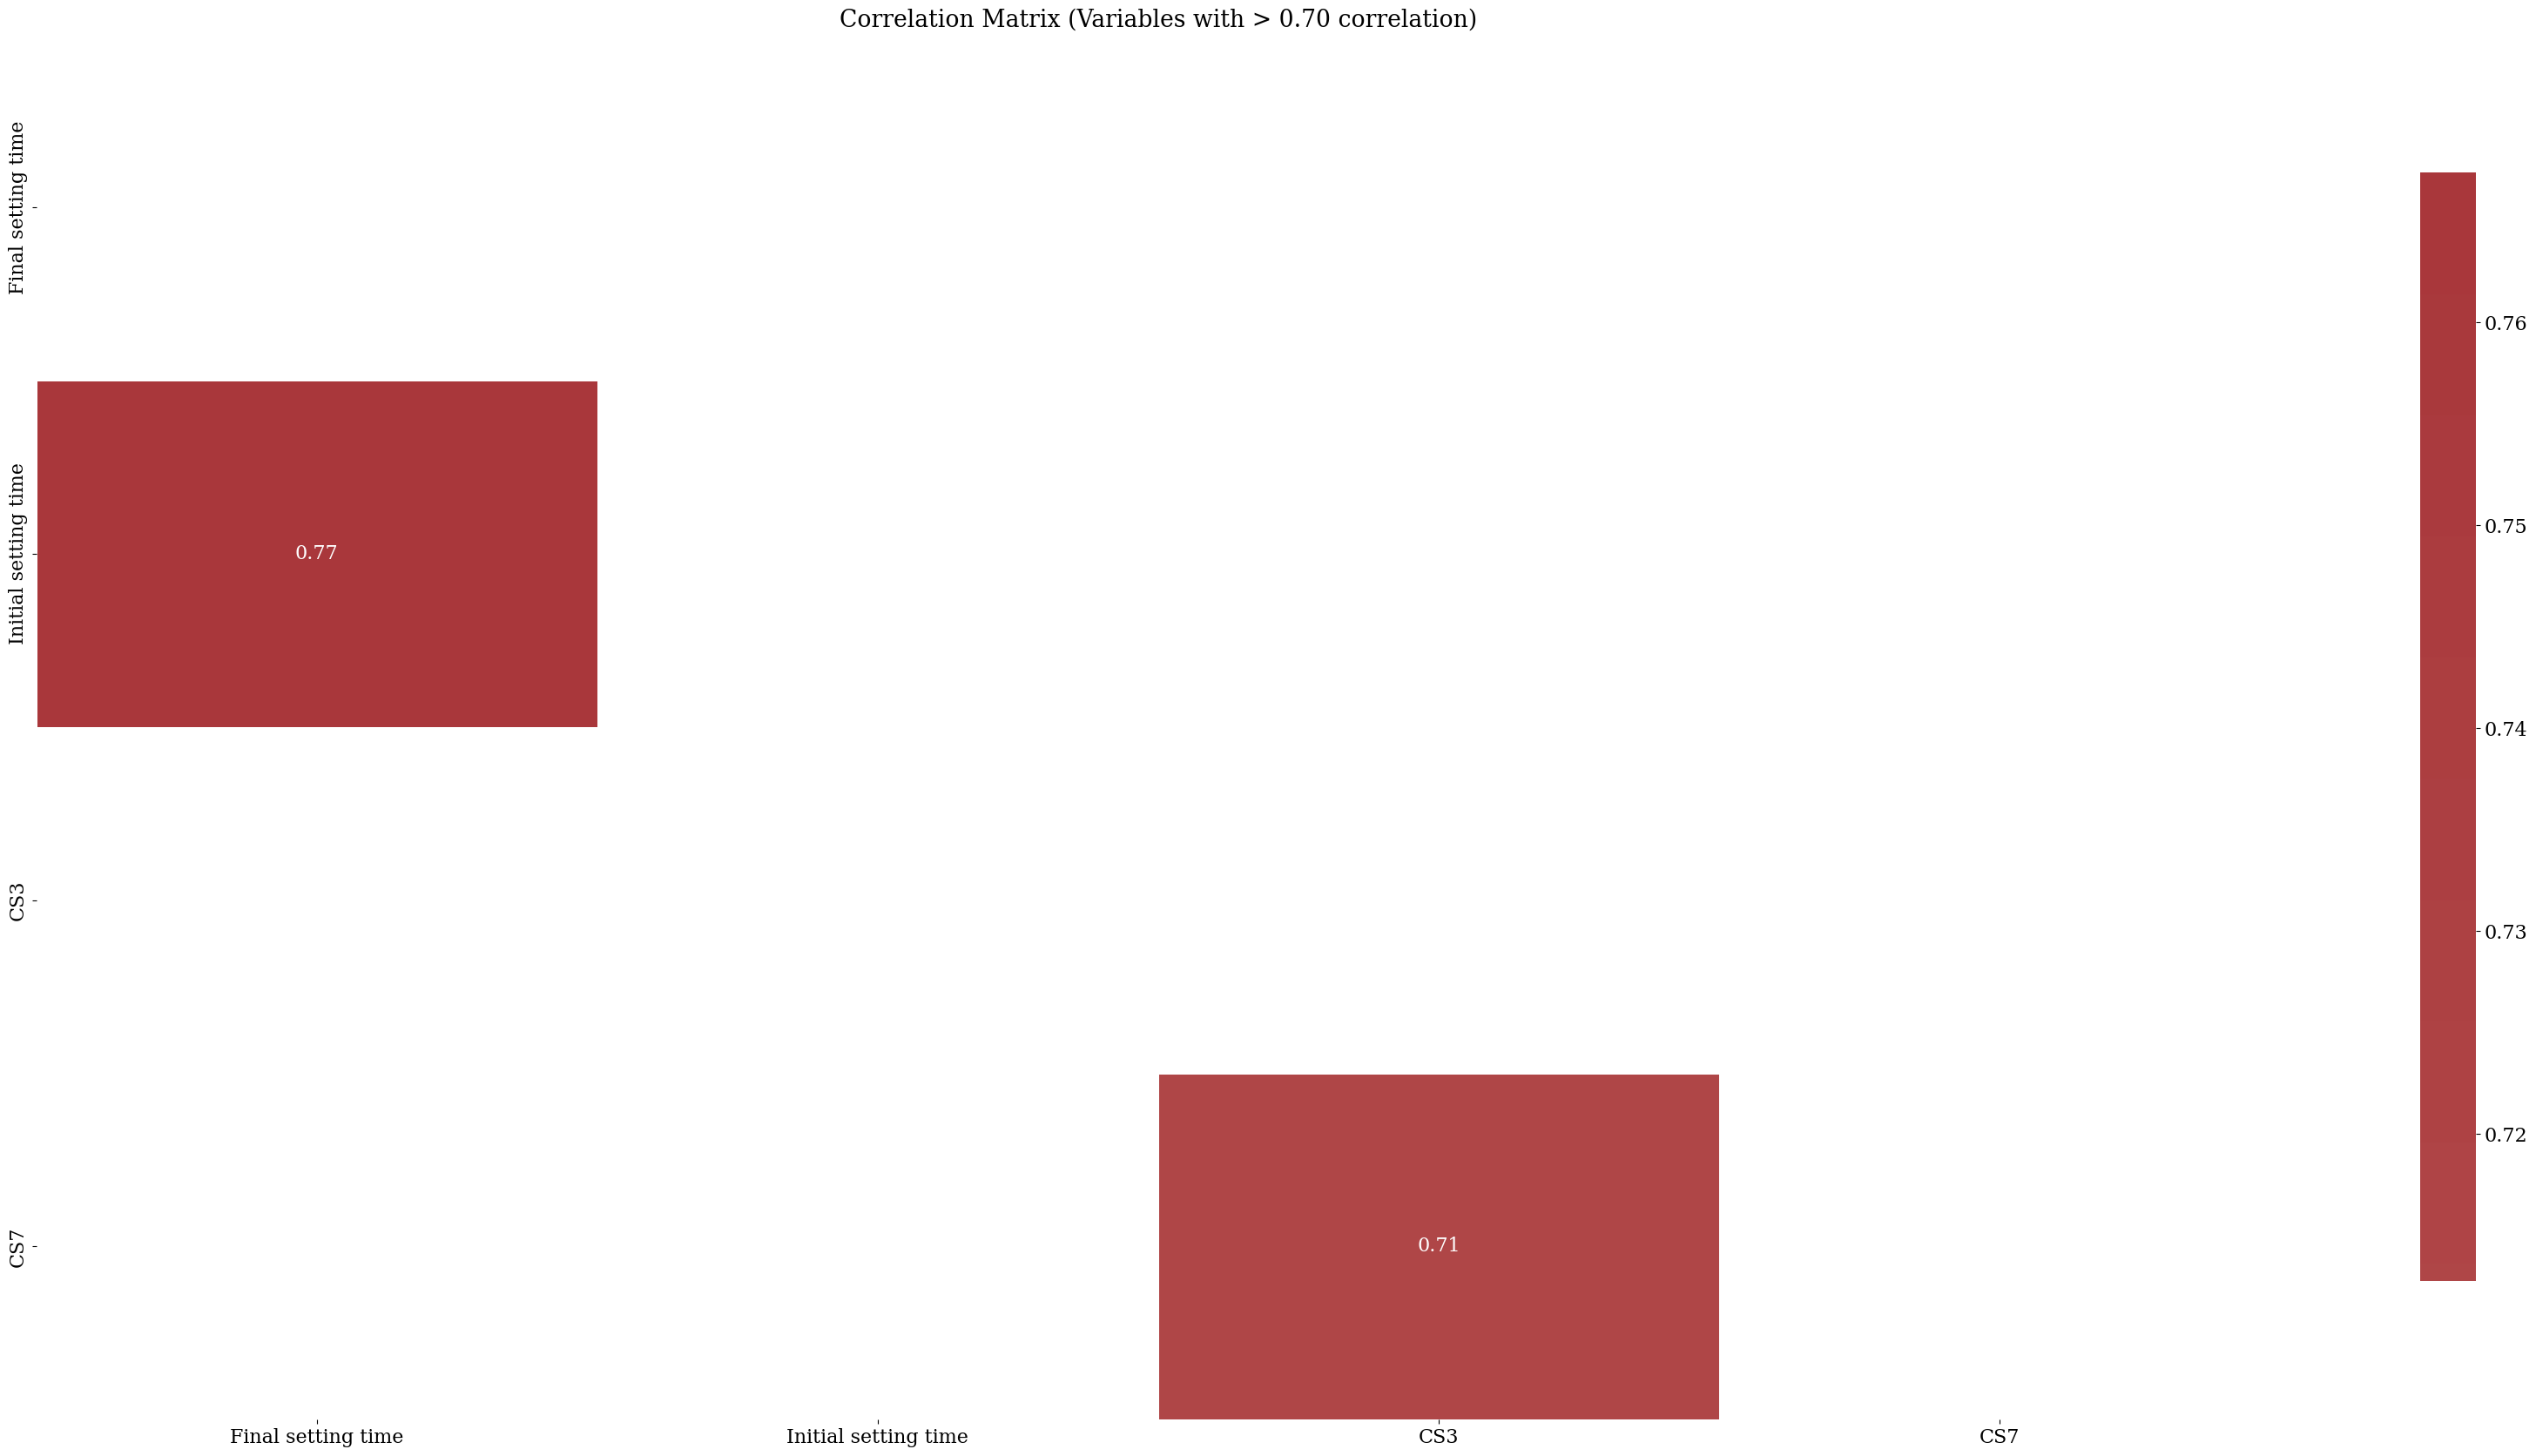

<IPython.core.display.Javascript object>

In [52]:
df_corr = df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall")


# plt.figure(figsize=(17, 13))
fig, ax = plt.subplots(figsize=(33, 17))

df_corr = df_corr[(abs(df_corr) > 0.70) & (abs(df_corr) < 1)]
df_corr = df_corr.dropna(how="all", axis=1).dropna(how="all", axis=0)
labels = np.where(
    np.abs(df_corr) >= 0.7, np.round(df_corr[np.abs(df_corr) >= 0.70], 2), ""
)

plt.title("Correlation Matrix (Variables with > 0.70 correlation)")
# plt.show()

sns.heatmap(
    df_corr,
    mask=np.triu(np.ones_like(df_corr, dtype=bool)),
    square=False,
    center=0,
    annot=labels,
    fmt="",
    linewidths=0.5,
    cmap="vlag",
    cbar_kws={"shrink": 0.8},
    ax=ax,
)

plt.tight_layout()

In [53]:
corr_matrix = (
    df.drop(["Plant", "Date", "Cement_Type"], axis=1).corr(method="kendall").abs()
)

sol = (
    corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    .stack()
    .sort_values(ascending=False)
)

sol[sol >= 0.70]

Final setting time  Initial setting time    0.767366
CS3                 CS7                     0.712740
dtype: float64

<IPython.core.display.Javascript object>

In [54]:
sol[sol.index.map(lambda x: "CS28" in x)]

CS7                   CS28    0.628379
CS3                   CS28    0.494211
Al2O3                 CS28    0.341100
MgO                   CS28    0.293016
CS1                   CS28    0.290571
Insoluble Residue     CS28    0.287293
Loss on Ignition      CS28    0.262625
SiO2                  CS28    0.225940
CaO                   CS28    0.193514
TiO2                  CS28    0.131781
Specific Gravity      CS28    0.129179
Initial setting time  CS28    0.115553
Final setting time    CS28    0.113054
#325                  CS28    0.090842
Fe2O3                 CS28    0.079443
Blaine                CS28    0.077710
SO3                   CS28    0.067760
K2O                   CS28    0.048796
#200                  CS28    0.033744
Na2O                  CS28    0.014199
dtype: float64

<IPython.core.display.Javascript object>

#### Bivariate Analysis

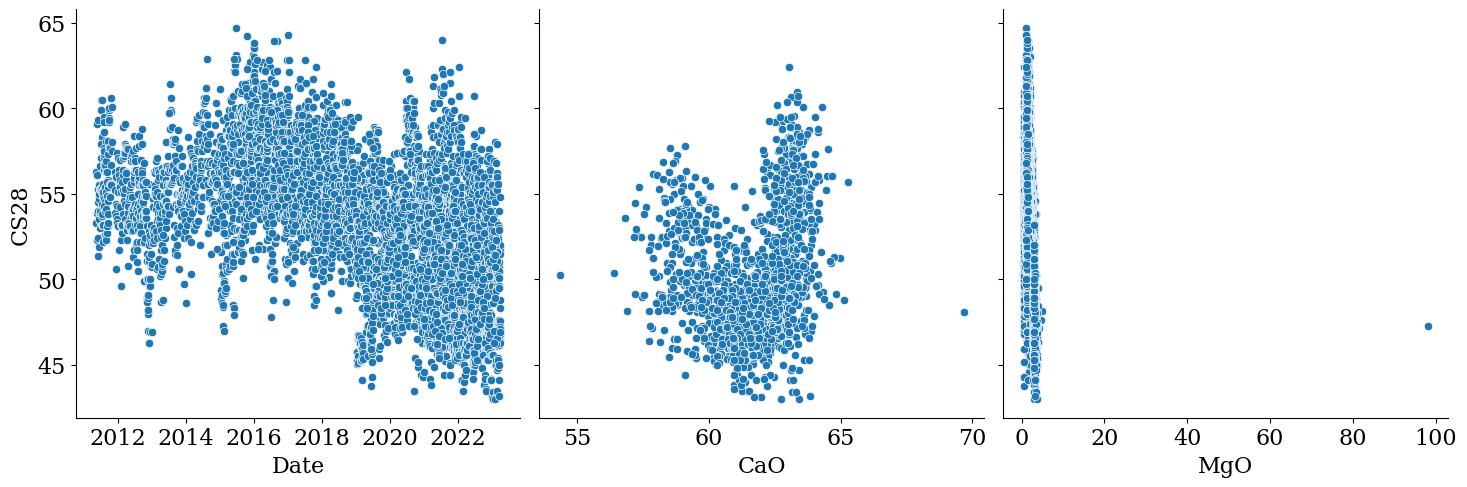

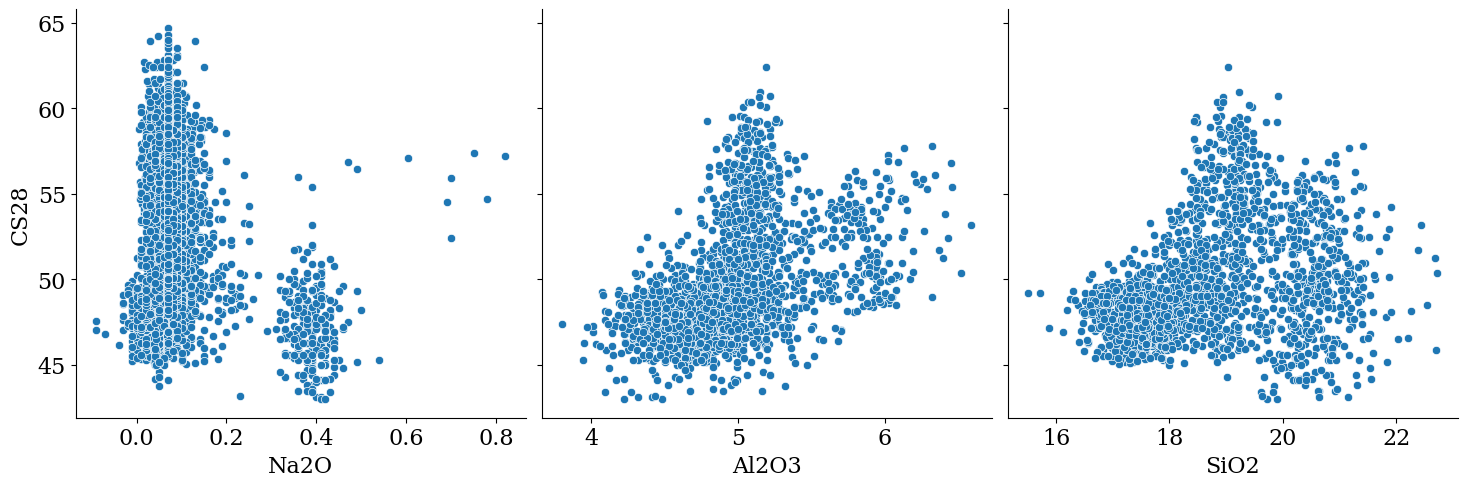

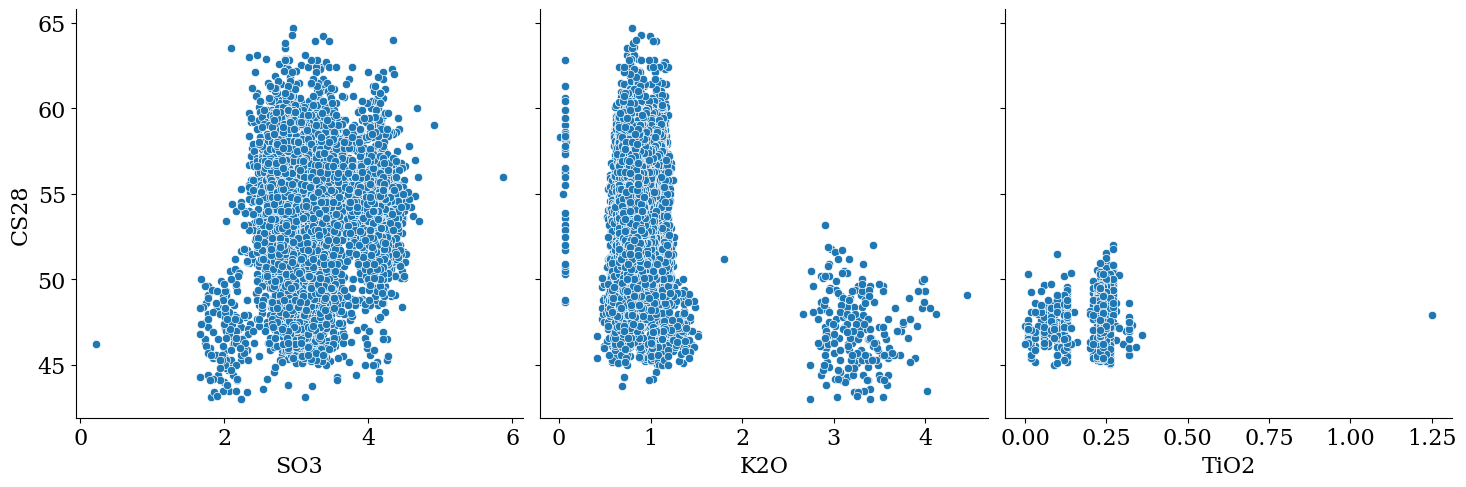

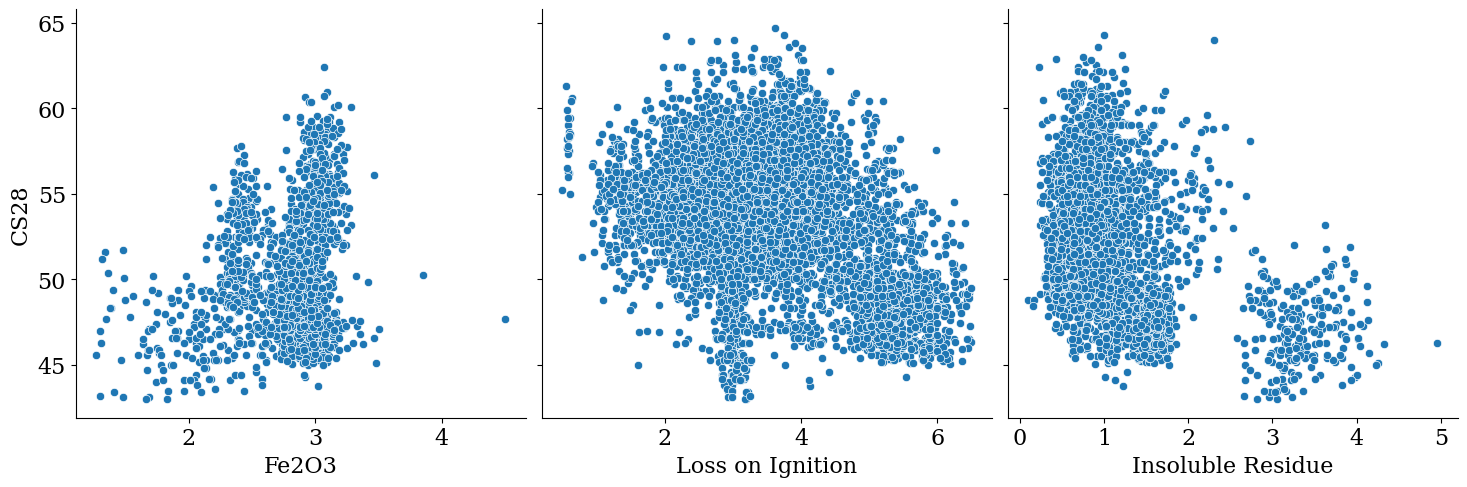

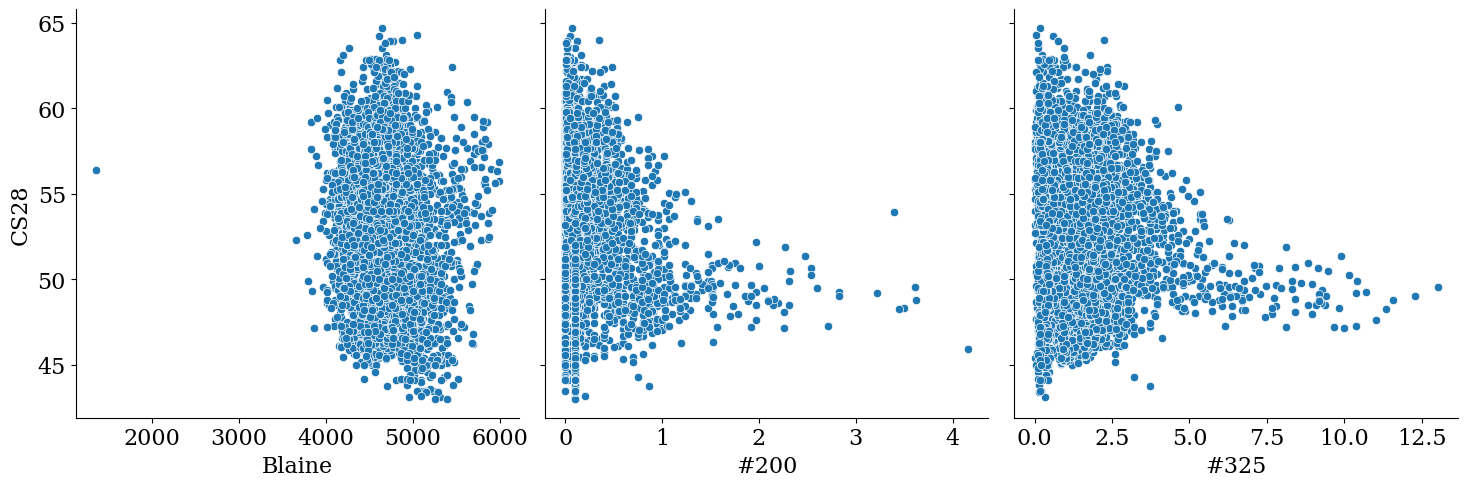

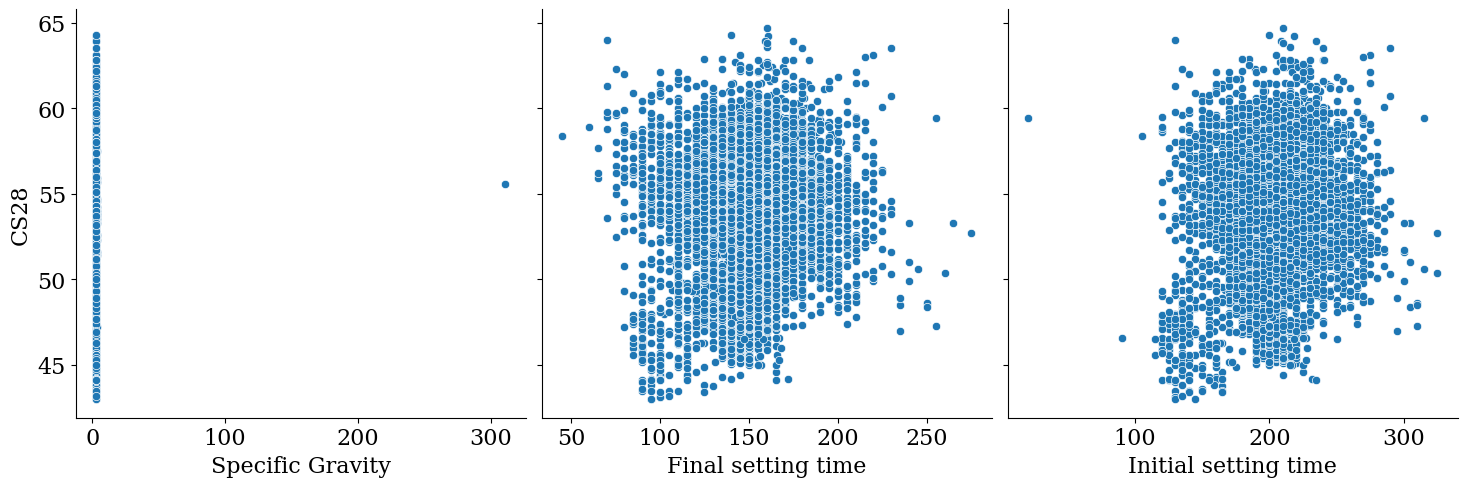

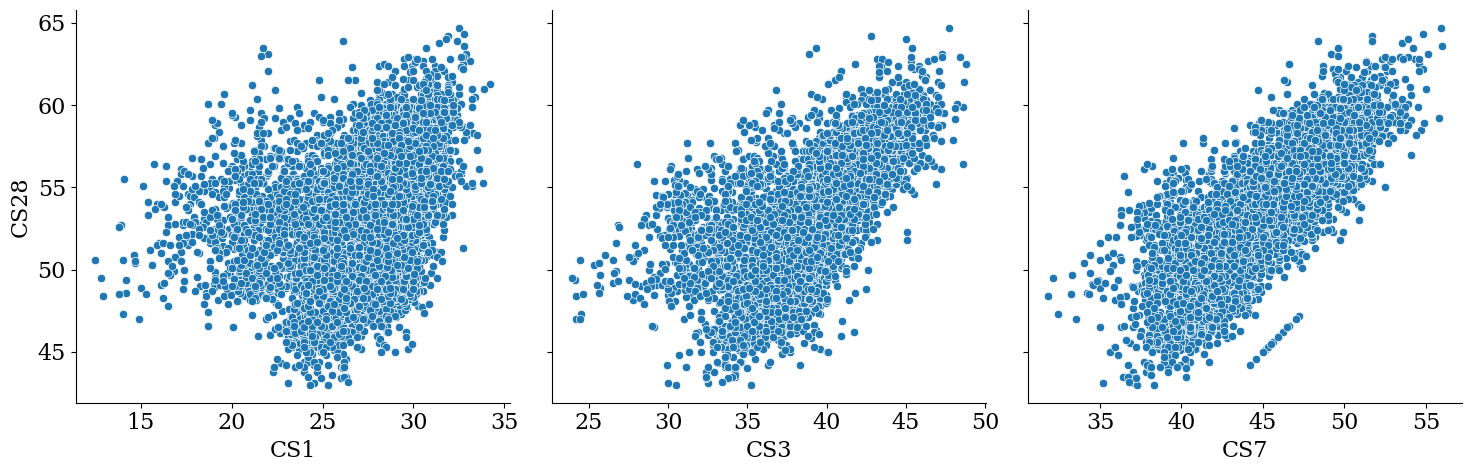

<IPython.core.display.Javascript object>

In [55]:
num_lines = 7
plots_per_line = 3

variables_to_plot = df.select_dtypes(exclude=object).columns.tolist()
variables_to_plot.remove("CS28")

warnings.filterwarnings("ignore")

for n in range(num_lines):
    start_idx = n * plots_per_line
    end_idx = start_idx + plots_per_line

    grid = sns.pairplot(
        df,
        x_vars=variables_to_plot[start_idx:end_idx],
        y_vars=["CS28"],
        diag_kind="kde",
        kind="scatter",
        height=5,
    )

# grid.fig.suptitle(
#     "Bivariate Analysis: Variables vs. 28-day Compressive Strength", y=1.02
# )
plt.tight_layout()
plt.show()

In [56]:
def corrfunc(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f"ρ = {r:.2f}", xy=(0.1, 0.9), xycoords=ax.transAxes)
    return None

<IPython.core.display.Javascript object>

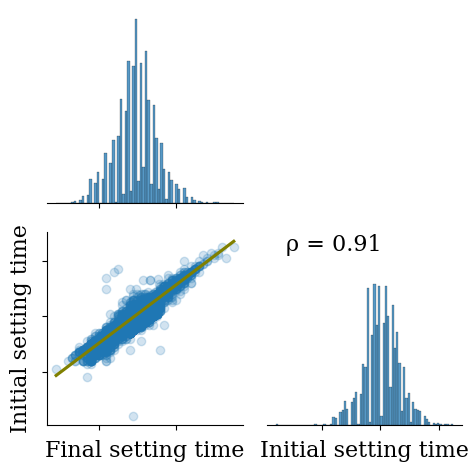

<IPython.core.display.Javascript object>

In [57]:
warnings.filterwarnings("ignore")

for pair in sol[sol > 0.75].index.values:
    if pair[0] != pair[1]:
        data = df[[pair[0], pair[1]]].dropna()
        g = sns.pairplot(
            data,
            corner=True,
            kind="reg",
            plot_kws={"line_kws": {"color": "olive"}, "scatter_kws": {"alpha": 0.2}},
        )
        corrfunc(data[pair[0]], data[pair[1]])
        g.set(xticklabels=[])
        g.set(yticklabels=[])

plt.tight_layout()

### 4. Date/TimeVariable Analyses

In [58]:
# How many days are valid datas e.g not weekends

valid_days = np.count_nonzero(
    np.is_busday(dates.apply(lambda x: x.date()).unique().astype("datetime64"))
)
print(valid_days, "valid days out of", len(dates.apply(lambda x: x.date()).unique()))

2495 valid days out of 2703


<IPython.core.display.Javascript object>

In [59]:
# What are the years the data was collected?
years = set(map(lambda date: date.year, dates))
print("Years present in the data:", years)

Years present in the data: {2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2011, 2012, 2013, 2014, 2015}


<IPython.core.display.Javascript object>

In [60]:
# What are months the data was collected for every year?

months_each_year = {}
for year in years:
    months_each_year[year] = set([date.month for date in dates if date.year == year])

print("Months of data for each year:")
months_each_year

Months of data for each year:


{2016: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2017: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2018: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2019: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2020: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2021: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2022: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2023: {1, 2, 3, 4},
 2011: {5, 6, 7, 8, 9, 10, 12},
 2012: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2013: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2014: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12},
 2015: {1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12}}

<IPython.core.display.Javascript object>

In [61]:
# How many unique days every month has for every year?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"])["Day"].apply(
    lambda x: len(x.unique())
)

# Give a name to the series
df_year_month.name = "Unique days per month"

# Print the dataframe
print(df_year_month)

Year  Month
2011  5         8
      6        14
      7        18
      8        16
      9        19
               ..
2022  12       26
2023  1        25
      2        22
      3        24
      4        19
Name: Unique days per month, Length: 143, dtype: int64


<IPython.core.display.Javascript object>

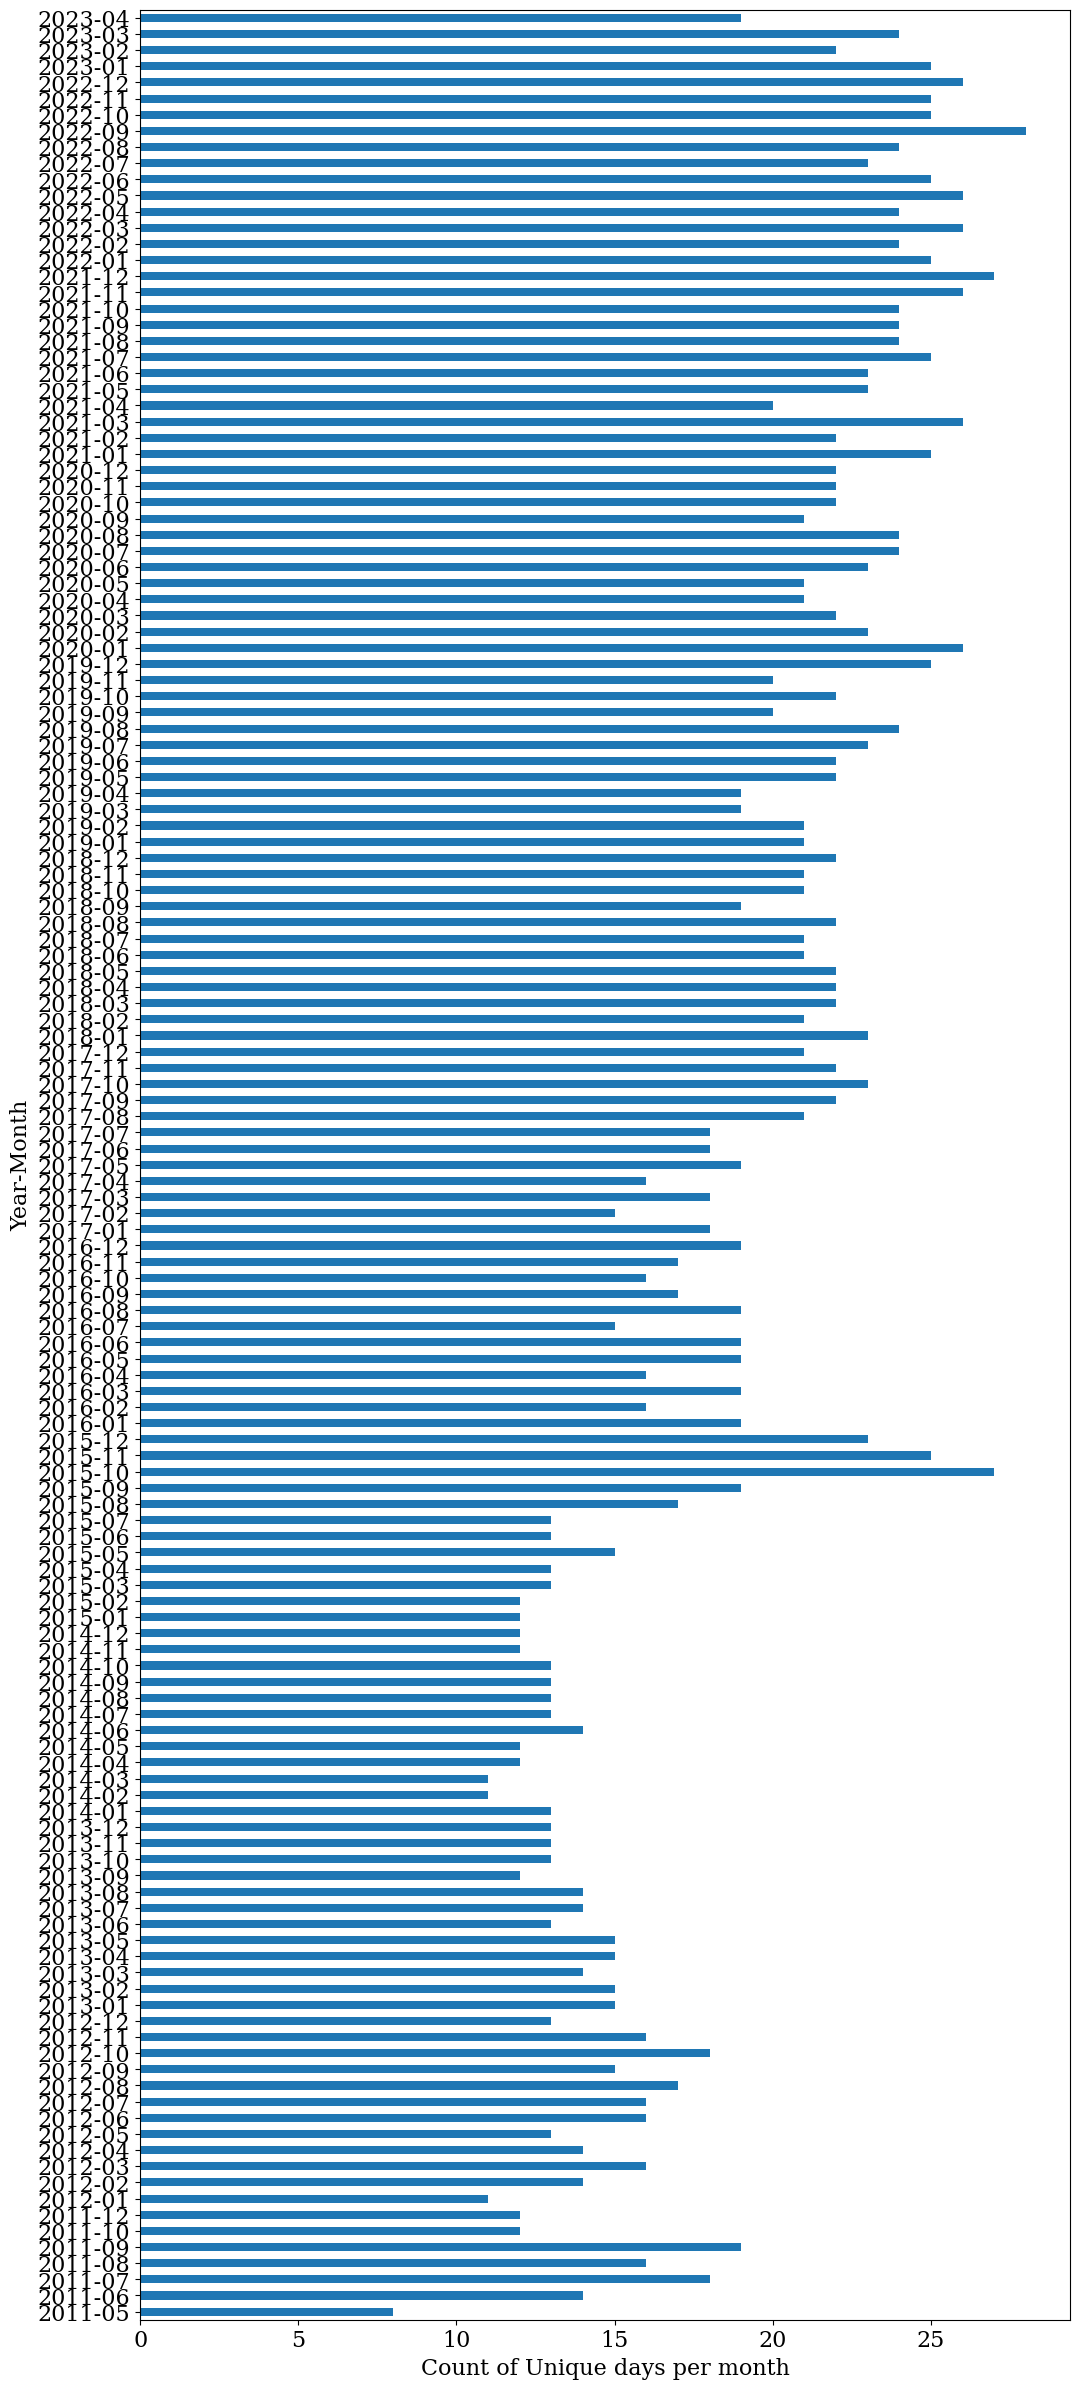

<IPython.core.display.Javascript object>

In [62]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(12, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of Unique days per month")
None

In [63]:
# How many data points every month has for every year?

year = dates.dt.year
month = dates.dt.month

# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month})

# Count the number of dates in each year and month
df_year_month = df_year_month.groupby(["Year", "Month"]).size()

# Give a name to the series
df_year_month.name = "size"

# Print the dataframe
print(df_year_month)

Year  Month
2011  5         8
      6        19
      7        23
      8        25
      9        22
               ..
2022  12       78
2023  1        84
      2        75
      3        87
      4        67
Name: size, Length: 143, dtype: int64


<IPython.core.display.Javascript object>

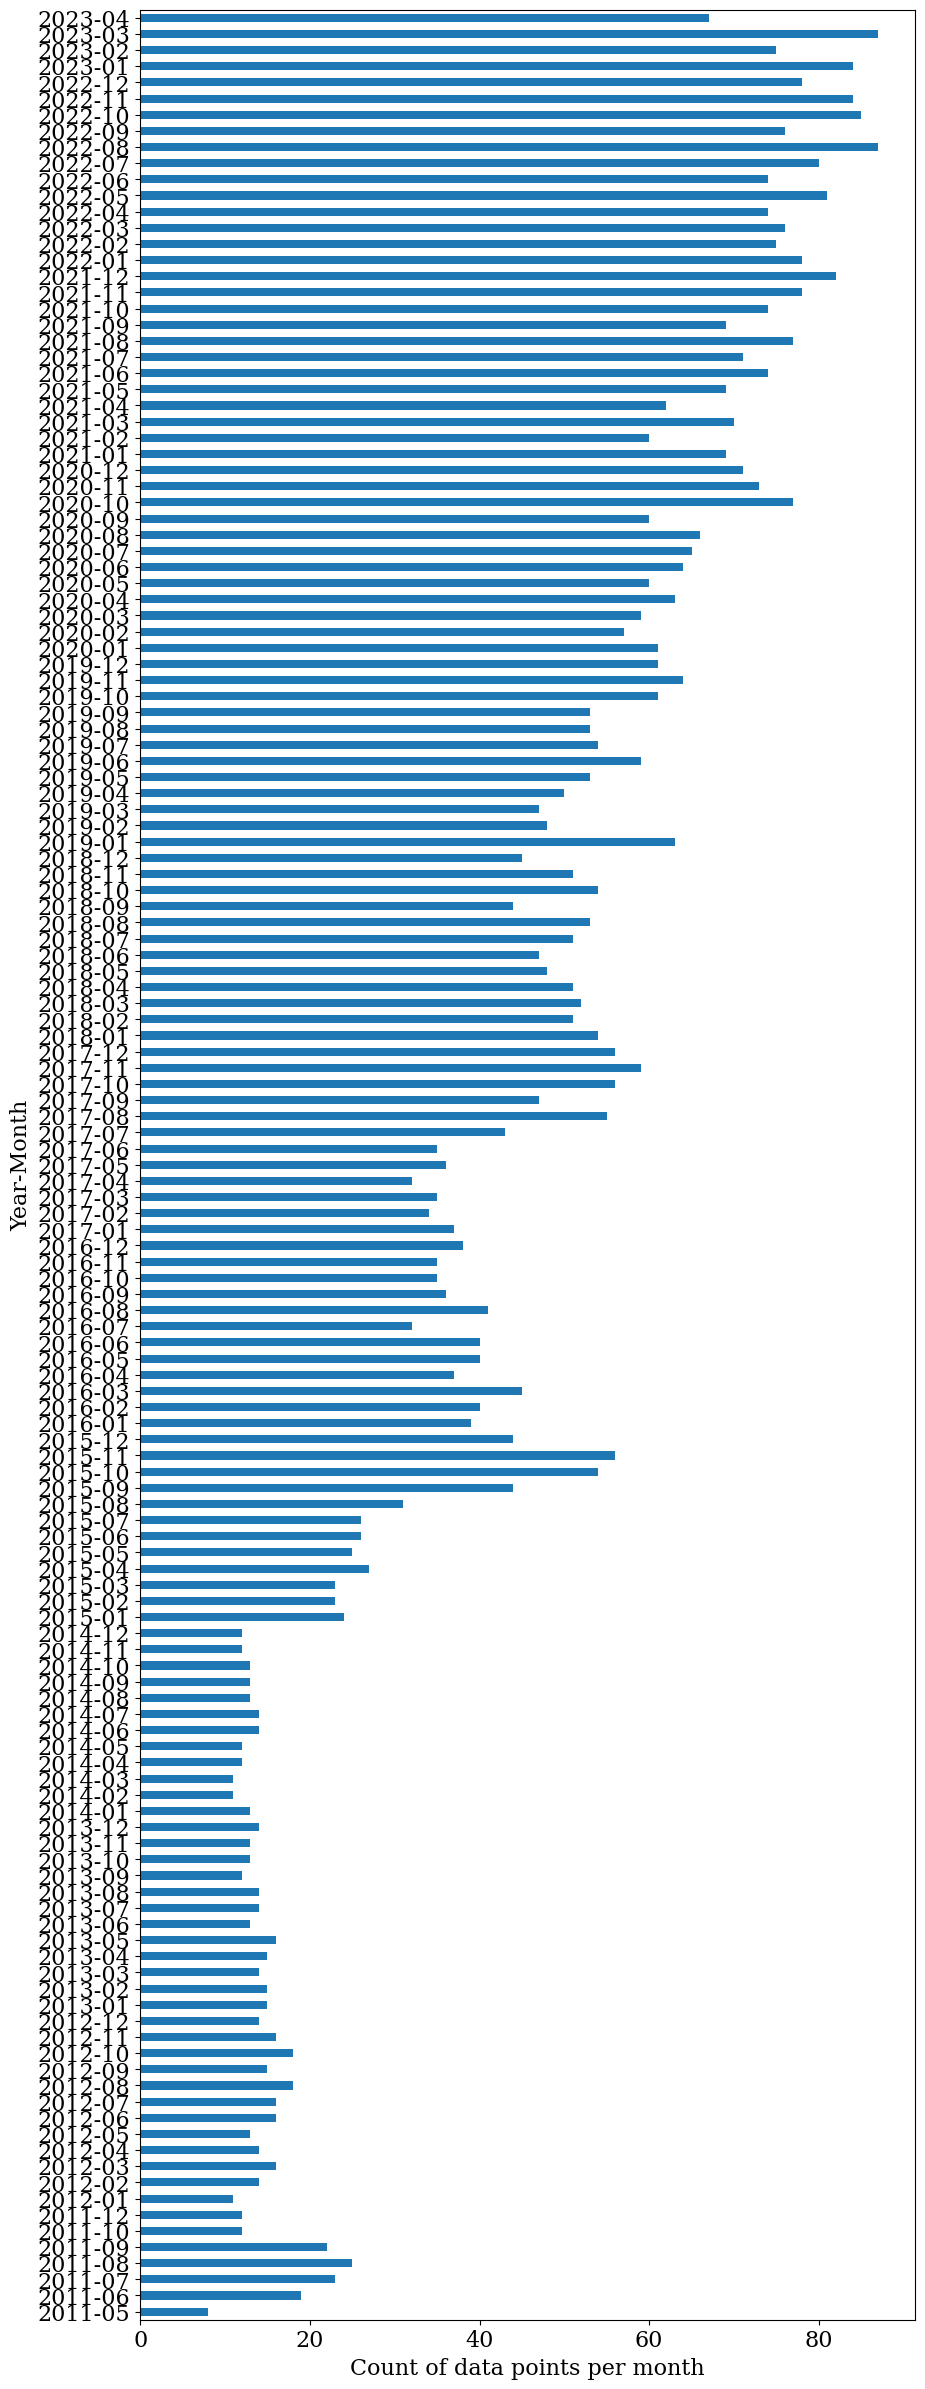

<IPython.core.display.Javascript object>

In [64]:
df_year_month_copy = df_year_month.copy()
df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"),

df_year_month_copy.index = (
    pd.to_datetime(
        df_year_month.index.map(lambda x: f"{x[0]}-{x[1]:02d}"), format="%Y-%m"
    ).to_period("M")
    # .strftime("%b %Y")
)
df_year_month_copy.index

plt.figure(figsize=(10, 30))
ax = df_year_month_copy.plot(kind="barh")
ax.set_ylabel("Year-Month")
ax.set_xlabel("Count of data points per month")
None

In [65]:
# What is the year-month with the minimum and maximum number of collected data points?

df_reseted = df_year_month.reset_index()
df_reseted["Year_Month"] = (
    df_reseted["Year"].apply(str) + "-" + df_reseted["Month"].apply(str)
)

min_obs_key, min_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].min()][
    ["Year_Month", "size"]
].values[0]

max_obs_key, max_obs_value = df_reseted[df_reseted["size"] == df_reseted["size"].max()][
    ["Year_Month", "size"]
].values[0]


print(min_obs_key, "has the minimum number of days with samples -", min_obs_value)
print(max_obs_key, "has the maximum number of days with samples -", max_obs_value)

2011-5 has the minimum number of days with samples - 8
2022-8 has the maximum number of days with samples - 87


<IPython.core.display.Javascript object>

In [66]:
# What is the mean number of observations per year?

mean_obs_per_year = df_year_month.groupby(["Year"]).mean(["size"]).apply(int).to_dict()

print("Mean Number of observations - per year")
print(mean_obs_per_year)
print()
print("Mean number of observations - all years")
print(int(df_year_month.mean()))

Mean Number of observations - per year
{2011: 17, 2012: 15, 2013: 14, 2014: 12, 2015: 33, 2016: 38, 2017: 43, 2018: 50, 2019: 55, 2020: 64, 2021: 71, 2022: 79, 2023: 78}

Mean number of observations - all years
43


<IPython.core.display.Javascript object>

In [67]:
# How many times every day reapeats for each year-month?

year = dates.dt.year
month = dates.dt.month
day = dates.dt.day
# Create a dataframe with the year and month of each date
df_year_month = pd.DataFrame({"Year": year, "Month": month, "Day": day})


# Group by year, month, and day, and count occurrences
day_counts = (
    df_year_month.groupby(["Year", "Month", "Day"]).size().reset_index(name="DayCount")
)

day_counts[["DayCount"]].describe()

DayCount
count  2703.000000
mean      2.280799
std       1.386179
min       1.000000
25%       1.000000
50%       2.000000
75%       3.000000
max       9.000000

<IPython.core.display.Javascript object>

In [68]:
day_counts[["DayCount"]].value_counts()

DayCount
1           1051
2            673
3            474
4            274
5            153
6             63
7             14
9              1
Name: count, dtype: int64

<IPython.core.display.Javascript object>

In [69]:
day_counts[day_counts["DayCount"] == day_counts["DayCount"].max()]

Year  Month  Day  DayCount
2586  2022     11   30         9

<IPython.core.display.Javascript object>

### Compressive Strength Distribution

#### 1 Day

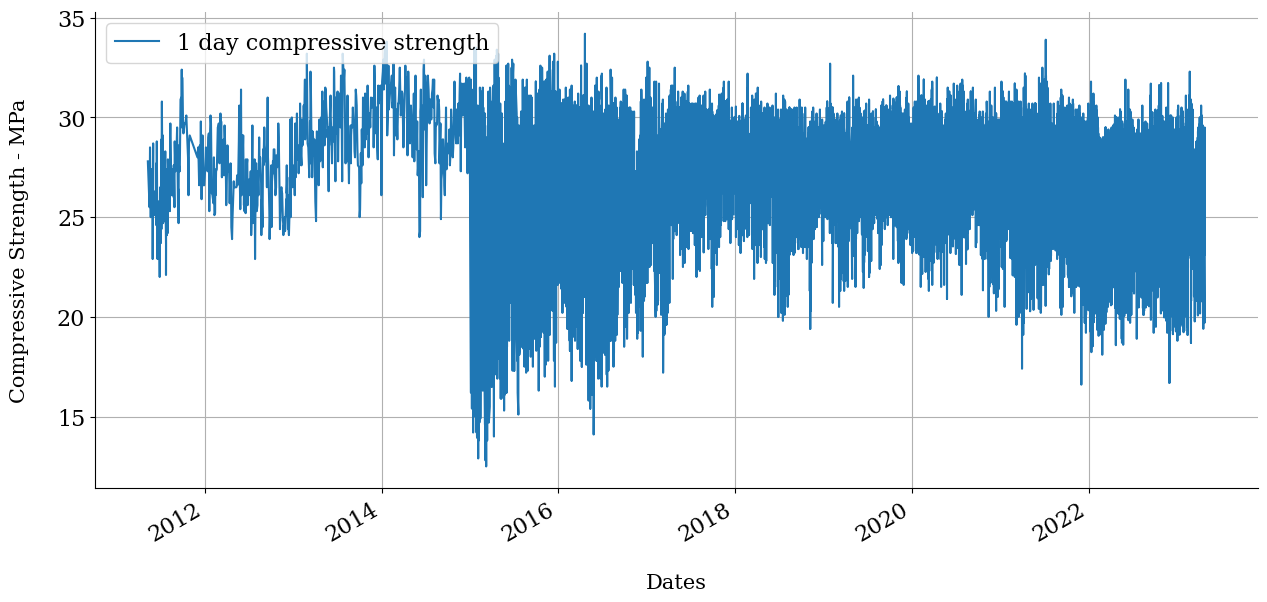

<IPython.core.display.Javascript object>

In [70]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

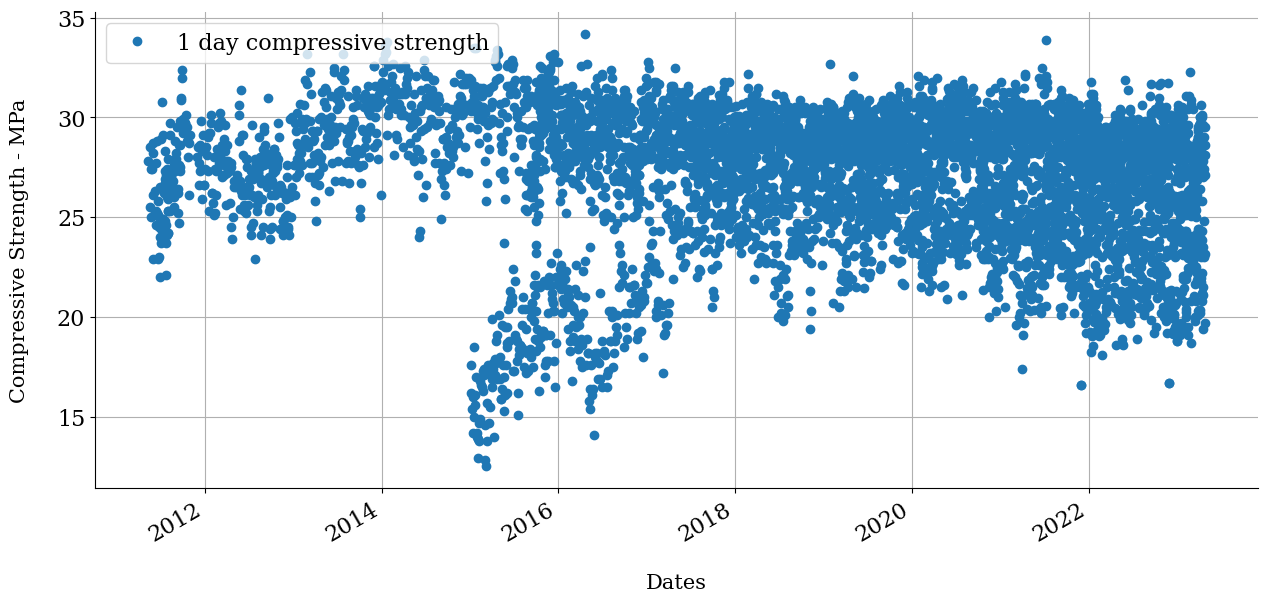

<IPython.core.display.Javascript object>

In [71]:
tmp = df[["Date", "CS1"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax, marker="o", linestyle="")
ax.grid(which="both")
ax.legend(["1 day compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 3 Days

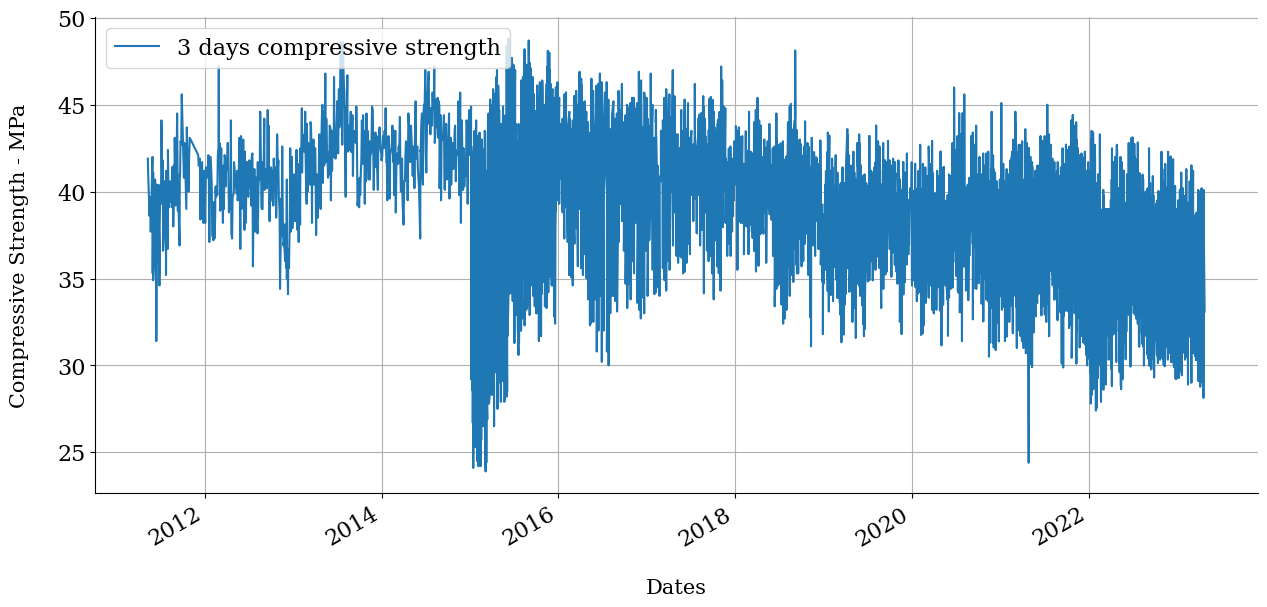

<IPython.core.display.Javascript object>

In [72]:
tmp = df[["Date", "CS3"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["3 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 7 Days

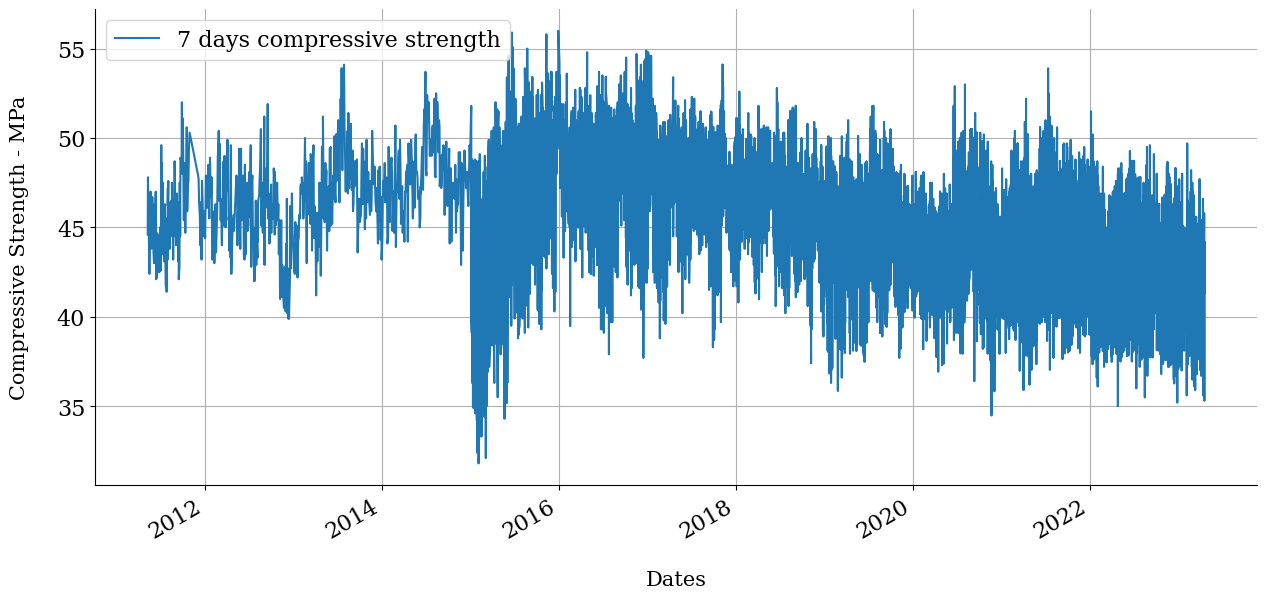

<IPython.core.display.Javascript object>

In [73]:
tmp = df[["Date", "CS7"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["7 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()

#### 28 Days

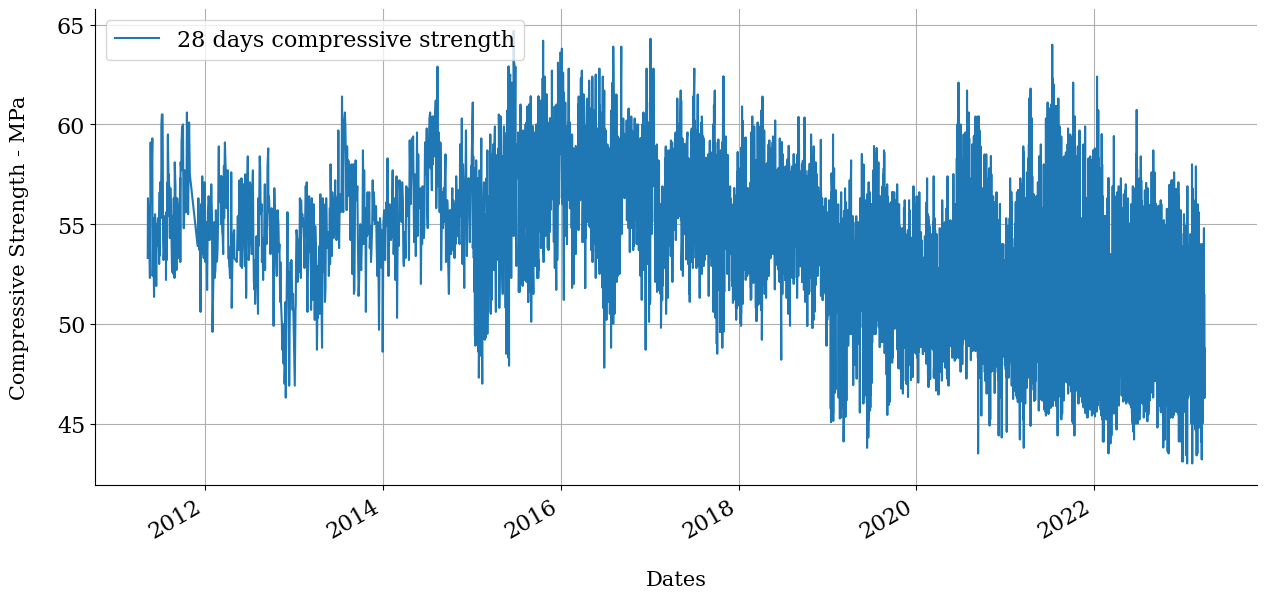

<IPython.core.display.Javascript object>

In [74]:
tmp = df[["Date", "CS28"]].dropna().copy()
tmp = tmp[tmp["Date"].dt.year != 1900].reset_index(drop=True)
tmp = tmp.set_index("Date")

fig, ax = plt.subplots(1, 1, sharex=True, sharey=True, figsize=(15, 7))
tmp.plot(ax=ax)
ax.grid(which="both")
ax.legend(["28 days compressive strength"], loc="upper left")
ax.set_xlabel("Dates", labelpad=20, fontsize=15)
ax.set_ylabel("Compressive Strength - MPa", labelpad=20, fontsize=15)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

plt.show()